# Analysis of Data 3

My business goal is identifying whether the company will bankrupt or not in three years., I will focus on the performance of 'recall' metric in order to minimize false negatives. Besides, I will also keep an eye on 'f1', and 'AUC' metrics.

I will use the Ensemble Method 'XGBoost', eXtreme Gradient Boosting for classification.

In this notebook, I will analyze data 3 - '3year.arff' 


## Load Libraries

In [1]:
# Import base libraries
import pandas as pd
import numpy as np
from scipy.io import arff

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.utils import class_weight

from functions import *

from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

## Load Data

There are five data files: 
    * data1, 1year.arff 
    * data2, 2year.arff 
    * data3, 3year.arff
    * data4, 4year.arff
    * data5, 5year.arff

Initially, I will explore the models on data3. After determing the best model design, I will apply it on other datasets and compare the results.

Note: No cleaning applied to data. XGBoost Classifier can handle the missing values and outliers.

In [2]:
# Load data
data3 = arff.loadarff('data/3year.arff')
df3 = pd.DataFrame(data3[0])

# Change label/class type to binary
df3['class'] = df3['class'].astype('int64')

df3.shape

(10503, 65)

## Pre-process

In [3]:
# Assign target and predictor
y = df3['class']
X = df3.drop('class', axis=1)

# Sepearate data into train and test splist
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Scale/Normalize the predictor variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

print('X_train shape = ', X_train.shape)
print('y_train shape = ', y_train.shape)
print('X_test shape = ', X_test.shape)
print('y_test shape = ', y_test.shape)

X_train shape =  (8402, 64)
y_train shape =  (8402,)
X_test shape =  (2101, 64)
y_test shape =  (2101,)


## Model 1: Baseline Model


In [9]:
# Model 1: Baseline Model

xgbParams_1 = {
    'eval_metric': 'logloss', 
    'random_state': 42,
}

model_1 = xgb_model_report(3, X_train, y_train, X_test, y_test, xgbParams_1, 'model_1', 0, 1, 1)

Data 3 Classification Report:

Training Data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      8014
           1       1.00      1.00      1.00       388

    accuracy                           1.00      8402
   macro avg       1.00      1.00      1.00      8402
weighted avg       1.00      1.00      1.00      8402

Testing Data:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1994
           1       0.93      0.47      0.62       107

    accuracy                           0.97      2101
   macro avg       0.95      0.73      0.80      2101
weighted avg       0.97      0.97      0.97      2101



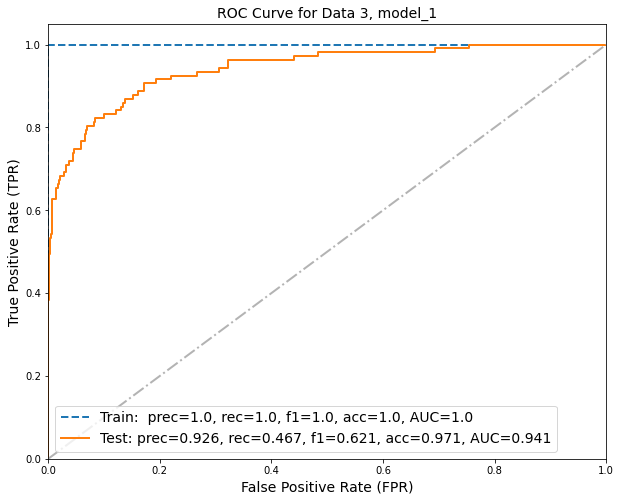

In [5]:
#Plot ROC curve

plot_ROC(3, X_train, y_train, X_test, y_test, model_1, 'model_1', 1)

In [7]:
model_1.get_params

<bound method XGBModel.get_params of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, random_state=42, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)>

**Comments**

* The class imbalance is the reason for the class 0/1 performance difference.
* There is large overfitting.


### Model 2: Model with Class Imbalance treated

I will use the class balance method optimized in 'analysis_2_imbalance' jupyter notebook.

For max_depth=6:
* sample_weight + 'scale_pos_weight=20'

In [10]:
# Model 2: Baseline Model + sample_weight + 'scale_pos_weight=20'

xgbParams = {
    'eval_metric': 'logloss', 
    'random_state': 42,
    'scale_pos_weight': 20,
}

model_2 = xgb_model_report(3, X_train, y_train, X_test, y_test, xgbParams, 'model_2', 1, 1, 1)

Sample weights are used!
Data 3 Classification Report:

Training Data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      8014
           1       0.99      1.00      0.99       388

    accuracy                           1.00      8402
   macro avg       0.99      1.00      1.00      8402
weighted avg       1.00      1.00      1.00      8402

Testing Data:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1994
           1       0.68      0.61      0.64       107

    accuracy                           0.97      2101
   macro avg       0.83      0.80      0.81      2101
weighted avg       0.96      0.97      0.96      2101



In [6]:
model_2.get_params

<bound method XGBModel.get_params of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, random_state=42, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=20, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)>

precision  recall     f1  accuracy    auc
Params                                                    
Model 1  Train       1.000   1.000  1.000     1.000  1.000
Test                 0.926   0.467  0.621     0.971  0.941
Model 2  Train       0.990   1.000  0.995     1.000  1.000
Test                 0.677   0.607  0.640     0.965  0.916

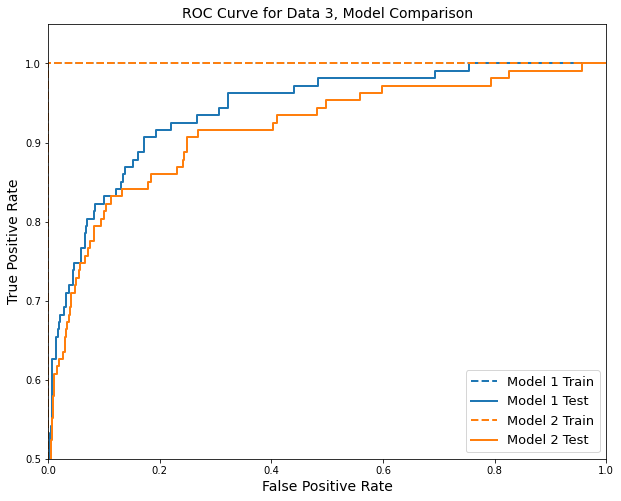

In [6]:
model_list = [model_1, model_2]
model_names_list = ['Model 1', 'Model 2']

compare_models(3, X_train, y_train, X_test, y_test, model_list, model_names_list, 'Model_1-2', 1, 1)

**Comments**

* Model 2 shows an improvement compared to Model 1.
* recall and f1 increased, even though precision and AUC decreased,
* Overfitting is still strong.

# Parameter Tuning and Overfitting

The ovefitting looks a like a main issue at this point.

I will try to control overfitting by tuning the XGBoost Classifier Parameters, while trying to improve the model at the same time.

I will first use **GridSearchCV** on few parameters to obtain best performance parameters. Then, I will deeper look in parameters that effect overfitting.

The paramaters that can affect overfitting are grouped in four categories:

1. Boosting Rounds
    * n_estimators
2. Pruning:
    * max_depth
    * min_child_weight
    * gamma   
3. Regularization:
    * learning_rate
    * max_delta_step
    * reg_lambda
    * reg_alpha     
4. Sampling
    * subsample
    * colsample_bytree

## Parameter Tuning with GridSearchCV

Scoring = 'f1'

Even though, my focus is on 'recall', I will use f1 in GridSearchCV to obtain overall good performance.

I will only use sample_weight method for parameter tuning. I choose not to use 'scale_pos_weight' during grid search, since the optimum value varies depending on the max_depth. After parameter tuning, I will find the optimum scale_pos_weight.

In [12]:
# Parameter Tuning with GridSearhCV

start=datetime.now()

xgbParams = {
    'eval_metric': 'logloss', 
    'random_state': 42,
    'tree_method': 'hist' #Train faster, default: 'exact'
}

xgb_param_grid = {
    'n_estimators': [50, 100, 150], #default: 100
    'max_depth': [3, 4, 5, 6], # default: 3
    'min_child_weight': [1, 2, 3], #default: 1
    'learning_rate': [0.1, 0.2, 0.3], # default: 0.1
    'subsample': [0.5, 0.7, 1] #default: 1
}

d3_weigths_train = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)

xgb = XGBClassifier(**xgbParams) 
xgb_gs = GridSearchCV(xgb, xgb_param_grid, cv=3, scoring='f1')
xgb_gs.fit(X_train, y_train, sample_weight=d3_weigths_train)

print('Parameter Tuning Results:\n')
print("Best Parameter Combination:", xgb_gs.best_params_)
print('Training Data:\n', classification_report(y_train, xgb_gs.predict(X_train)))
print('Testing Data:\n', classification_report(y_test, xgb_gs.predict(X_test)))

end=datetime.now()

print('Process time:', end-start)

Parameter Tuning Results:

Best Parameter Combination: {'learning_rate': 0.2, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 150, 'subsample': 1}
Training Data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      8014
           1       0.98      1.00      0.99       388

    accuracy                           1.00      8402
   macro avg       0.99      1.00      0.99      8402
weighted avg       1.00      1.00      1.00      8402

Testing Data:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1994
           1       0.81      0.59      0.68       107

    accuracy                           0.97      2101
   macro avg       0.89      0.79      0.83      2101
weighted avg       0.97      0.97      0.97      2101

Process time: 0:19:02.448128


### Model 3: Model after GridSearchCV Parameter Tuning

I will use Grid Search Parameters. 

For max_depth=5:
* sample_weight + 'scale_pos_weight=20'

In [11]:
# Model 3: Model after GridSearchCV Parameter Tuning

xgbParams = {
    'eval_metric': 'logloss', 
    'random_state': 42,
    'scale_pos_weight': 20,
    'n_estimators': 150, 
    'max_depth': 5,
    'min_child_weight': 1,
    'learning_rate': 0.20,
    'subsample': 1,
}

model_3 = xgb_model_report(3, X_train, y_train, X_test, y_test, xgbParams, 'model_3', 1, 1, 1)

Sample weights are used!
Data 3 Classification Report:

Training Data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      8014
           1       0.96      1.00      0.98       388

    accuracy                           1.00      8402
   macro avg       0.98      1.00      0.99      8402
weighted avg       1.00      1.00      1.00      8402

Testing Data:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1994
           1       0.64      0.64      0.64       107

    accuracy                           0.96      2101
   macro avg       0.81      0.81      0.81      2101
weighted avg       0.96      0.96      0.96      2101



In [74]:
model_3.get_params

<bound method XGBModel.get_params of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.2, max_delta_step=0,
              max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=150, n_jobs=4,
              num_parallel_tree=1, random_state=42, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=20, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)>

precision  recall     f1  accuracy    auc
Params                                                    
Model 1  Train       1.000   1.000  1.000     1.000  1.000
Test                 0.926   0.467  0.621     0.971  0.941
Model 2  Train       0.990   1.000  0.995     1.000  1.000
Test                 0.677   0.607  0.640     0.965  0.916
Model 3  Train       0.956   1.000  0.977     0.998  1.000
Test                 0.645   0.645  0.645     0.964  0.922

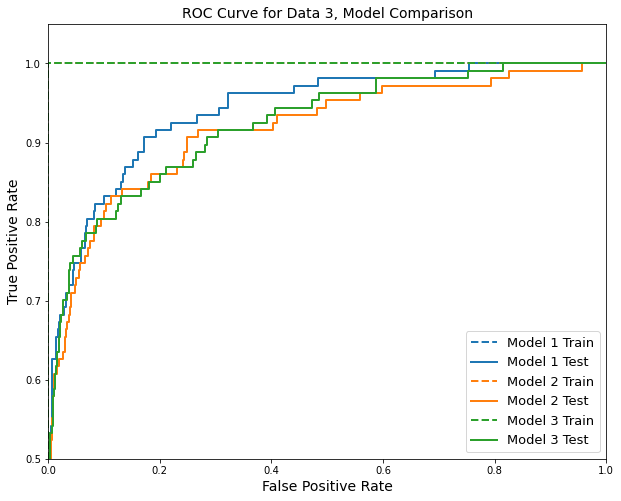

In [8]:
model_list = [model_1, model_2, model_3]
model_names_list = ['Model 1', 'Model 2', 'Model 3']

compare_models(3, X_train, y_train, X_test, y_test, model_list, model_names_list, 'Model_1-3', 1, 1)

**Comments**

* Model 3 has improved recall and f1 value.
* Overfitting decresed sligltly.

## Parameter Tuning with Boosting Rounds

### n_estimators

I will explore the Log Loss function first.

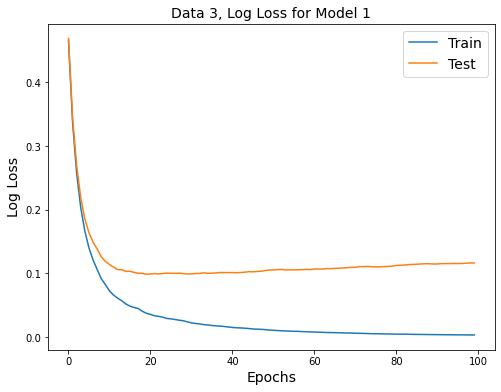

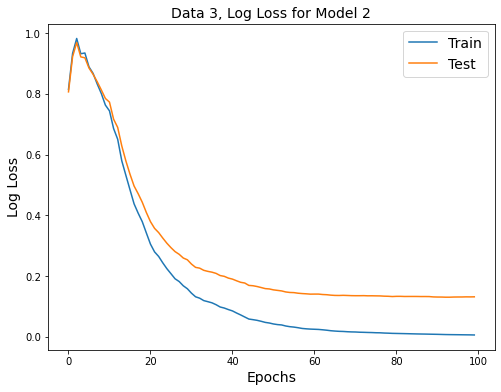

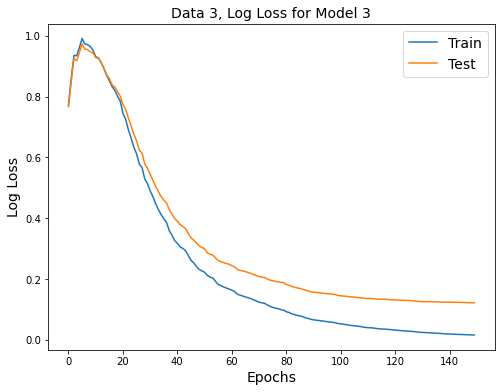

In [51]:
# Model 1, 2, 3 LogLoss

plot_logloss(3, model_1, 'Model 1', 0)
plot_logloss(3, model_2, 'Model 2', 0)
plot_logloss(3, model_3, 'Model 3', 0)

Sample weights are used!
--------



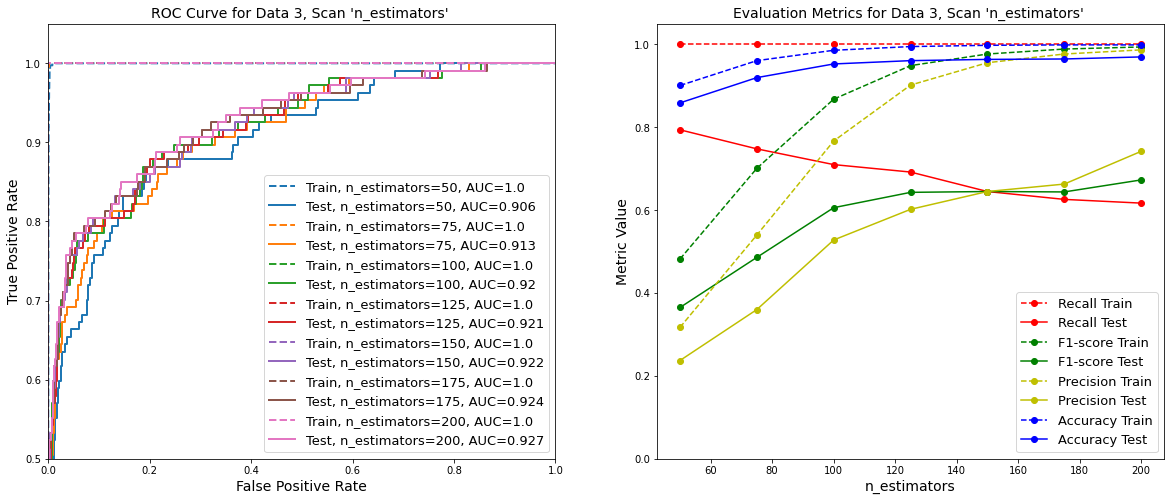

In [52]:
# Scan n_estimators

xgbParams = {
    'eval_metric': 'logloss', 
    'random_state': 42,
    'scale_pos_weight': 20,
    'max_depth': 5,
    'min_child_weight': 1,
    'learning_rate': 0.20,
    'subsample': 1,
}

scanParam = 'n_estimators'

scanList = [50, 75, 100, 125, 150, 175, 200]

results_est = scan_xgb_ROC_metrics(3, X_train, y_train, X_test, y_test, xgbParams, scanParam, scanList, 1, 1, 0)

**Comments**

* Overfitting increases as n_estimator increases
* Optimum n_estimator = 125 for Model 3 paramaters

**Early Stopping**

I tried to use 'early_stopping rounds', but for some reason it didn't work. The system chooses to ignore the parameter, even though train/fit runs without an error.

### Model 4: Model after n_estimator Tuninng

In [9]:
# Model 4: Model after n_estimator Tuninng

xgbParams = {
    'eval_metric': 'logloss', 
    'random_state': 42,
    'scale_pos_weight': 20,
    'n_estimators': 125, 
    'max_depth': 5,
    'min_child_weight': 1,
    'learning_rate': 0.20,
    'subsample': 1,
}

model_4 = xgb_model_report(3, X_train, y_train, X_test, y_test, xgbParams, 'model_4', 1, 1, 1)

Sample weights are used!
--------

Data 3 Classification Report:

Training Data:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      8014
           1       0.90      1.00      0.95       388

    accuracy                           1.00      8402
   macro avg       0.95      1.00      0.97      8402
weighted avg       1.00      1.00      1.00      8402

Testing Data:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1994
           1       0.60      0.69      0.64       107

    accuracy                           0.96      2101
   macro avg       0.79      0.83      0.81      2101
weighted avg       0.96      0.96      0.96      2101



In [75]:
model_4.get_params

<bound method XGBModel.get_params of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.2, max_delta_step=0,
              max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=125, n_jobs=4,
              num_parallel_tree=1, random_state=42, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=20, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)>

precision  recall     f1  accuracy    auc
Params                                                    
Model 1  Train       1.000   1.000  1.000     1.000  1.000
Test                 0.926   0.467  0.621     0.971  0.941
Model 2  Train       0.990   1.000  0.995     1.000  1.000
Test                 0.677   0.607  0.640     0.965  0.916
Model 3  Train       0.956   1.000  0.977     0.998  1.000
Test                 0.645   0.645  0.645     0.964  0.922
Model 4  Train       0.902   1.000  0.949     0.995  1.000
Test                 0.602   0.692  0.643     0.961  0.921

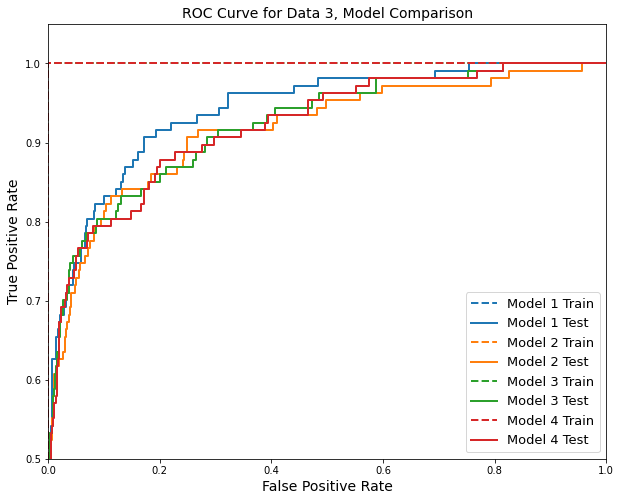

In [10]:
model_list = [model_1, model_2, model_3, model_4]
model_names_list = ['Model 1', 'Model 2', 'Model 3', 'Model 4']

compare_models(3, X_train, y_train, X_test, y_test, model_list, model_names_list, 'Model_l-4', 1, 1)

**Comments**

* Recall increased
* Overfitting sligtly decreased.

## Pruning Parameters Tuning 

### max_depth

Sample weights are used!
--------



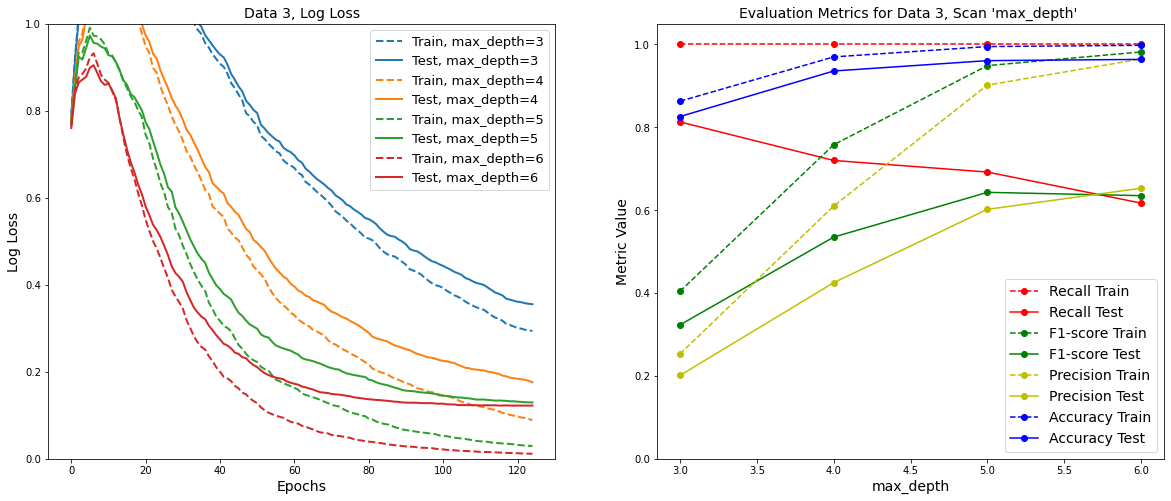

In [60]:
#Scan max_depth

xgbParams = {
    'eval_metric': 'logloss', 
    'random_state': 42,
    'scale_pos_weight': 20,
    'n_estimators': 125, 
    #'max_depth': 5,
    'min_child_weight': 1,
    'learning_rate': 0.20,
    'subsample': 1,
}

scanParam = 'max_depth'

scanList = [3, 4, 5, 6]

result_depth = scan_xgb_logloss_metrics(3, X_train, y_train, X_test, y_test, xgbParams, scanParam, scanList, 1, 1, 0)

**Comments**

* Overfitting decreases as the the max_depth increases.
* The 'recall' values also drops, as max_depth decreases.
* Optimum: max_depth=5.

### min_child_weight

Sample weights are used!
--------



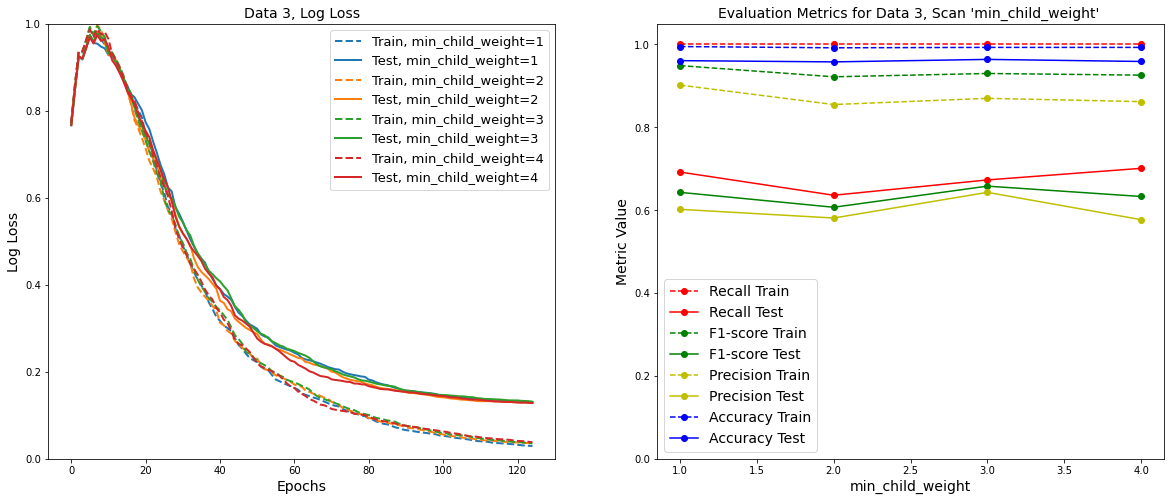

In [61]:
#Scan min_child_weight

xgbParams = {
    'eval_metric': 'logloss', 
    'random_state': 42,
    'scale_pos_weight': 20,
    'n_estimators': 125, 
    'max_depth': 5,
    #'min_child_weight': 1,
    'learning_rate': 0.20,
    'subsample': 1,
}

scanParam = 'min_child_weight'

scanList = [1, 2, 3, 4]

result_child = scan_xgb_logloss_metrics(3, X_train, y_train, X_test, y_test, xgbParams, scanParam, scanList, 1, 1, 0)

In [62]:
result_child

precision  recall     f1  accuracy  logloss
Params                                                                 
min_child_weight=1  Train       0.902   1.000  0.949     0.995    0.029
Test                            0.602   0.692  0.643     0.961    0.129
min_child_weight=2  Train       0.855   1.000  0.922     0.992    0.035
Test                            0.581   0.636  0.607     0.958    0.129
min_child_weight=3  Train       0.870   1.000  0.930     0.993    0.035
Test                            0.643   0.673  0.658     0.964    0.131
min_child_weight=4  Train       0.862   1.000  0.926     0.993    0.038
Test                            0.577   0.701  0.633     0.959    0.128

**Comments**

* min_child_weight has slight effect on model performance and overfitting.
* Optimum min_child_weight=3
    * f1 drops a bit
    * but ovefitting decreases some.

### gamma

Sample weights are used!
--------



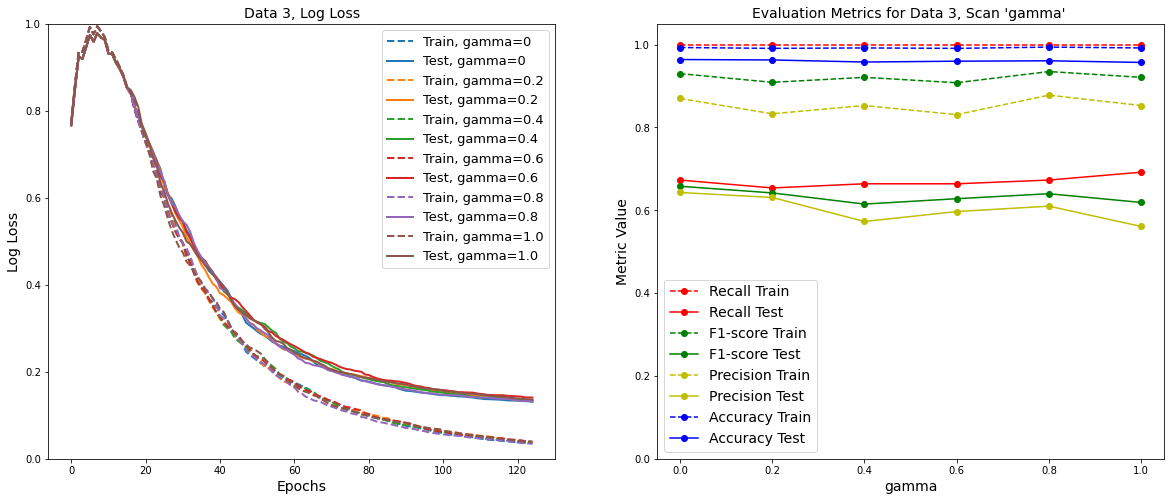

In [64]:
#Scan gamma

xgbParams = {
    'eval_metric': 'logloss', 
    'random_state': 42,
    'scale_pos_weight': 20,
    'n_estimators': 125, 
    'max_depth': 5,
    'min_child_weight': 3,
    'learning_rate': 0.20,
    'subsample': 1,
}

scanParam = 'gamma'

scanList = [0, 0.2, 0.4, 0.6, 0.8, 1.0]

result_gamma = scan_xgb_logloss_metrics(3, X_train, y_train, X_test, y_test, xgbParams, scanParam, scanList, 1, 1, 0)

In [65]:
result_gamma

precision  recall     f1  accuracy  logloss
Params                                                        
gamma=0  Train         0.870   1.000  0.930     0.993    0.035
Test                   0.643   0.673  0.658     0.964    0.131
gamma=0.2  Train       0.833   1.000  0.909     0.991    0.038
Test                   0.631   0.654  0.642     0.963    0.134
gamma=0.4  Train       0.853   1.000  0.921     0.992    0.039
Test                   0.573   0.664  0.615     0.958    0.135
gamma=0.6  Train       0.831   1.000  0.908     0.991    0.040
Test                   0.597   0.664  0.628     0.960    0.141
gamma=0.8  Train       0.878   1.000  0.935     0.994    0.035
Test                   0.610   0.673  0.640     0.961    0.133
gamma=1.0  Train       0.853   1.000  0.921     0.992    0.038
Test                   0.561   0.692  0.619     0.957    0.136

**Comments**

* The model performance and overfitting didn't improve much.
* Overfitting increase for higher gamma values.
* Selected gamma=0 (default)

### Model 5: Model after Pruning

In [11]:
# Model 5: Model after Pruning

xgbParams = {
    'eval_metric': 'logloss', 
    'random_state': 42,
    'scale_pos_weight': 20,
    'n_estimators': 125, 
    'max_depth': 5,
    'min_child_weight': 3,
    'gamma': 0,
    'learning_rate': 0.20,
    'subsample': 1,
}

model_5 = xgb_model_report(3, X_train, y_train, X_test, y_test, xgbParams, 'model_5', 1, 1, 1)

Sample weights are used!
--------

Data 3 Classification Report:

Training Data:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      8014
           1       0.87      1.00      0.93       388

    accuracy                           0.99      8402
   macro avg       0.93      1.00      0.96      8402
weighted avg       0.99      0.99      0.99      8402

Testing Data:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1994
           1       0.64      0.67      0.66       107

    accuracy                           0.96      2101
   macro avg       0.81      0.83      0.82      2101
weighted avg       0.97      0.96      0.96      2101



In [77]:
model_5.get_params

<bound method XGBModel.get_params of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.2, max_delta_step=0,
              max_depth=5, min_child_weight=3, missing=nan,
              monotone_constraints='()', n_estimators=125, n_jobs=4,
              num_parallel_tree=1, random_state=42, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=20, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)>

precision  recall     f1  accuracy    auc
Params                                                    
Model 1  Train       1.000   1.000  1.000     1.000  1.000
Test                 0.926   0.467  0.621     0.971  0.941
Model 2  Train       0.990   1.000  0.995     1.000  1.000
Test                 0.677   0.607  0.640     0.965  0.916
Model 3  Train       0.956   1.000  0.977     0.998  1.000
Test                 0.645   0.645  0.645     0.964  0.922
Model 4  Train       0.902   1.000  0.949     0.995  1.000
Test                 0.602   0.692  0.643     0.961  0.921
Model 5  Train       0.870   1.000  0.930     0.993  1.000
Test                 0.643   0.673  0.658     0.964  0.913

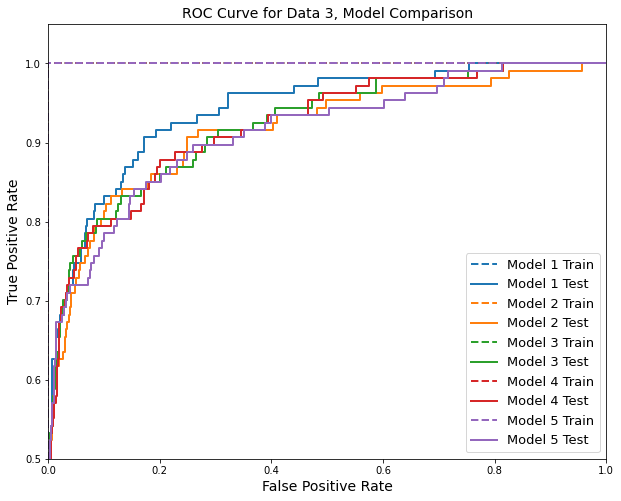

In [12]:
model_list = [model_1, model_2, model_3, model_4, model_5]
model_names_list = ['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5']

compare_models(3, X_train, y_train, X_test, y_test, model_list, model_names_list, 'Model_l-5', 1, 1)

**Comments**

* Overfitting decreased.
* Recall and AUC decreased.
* f1 and precision increased.

## Regularization Parameters Tuning

### learning_rate

Sample weights are used!
--------



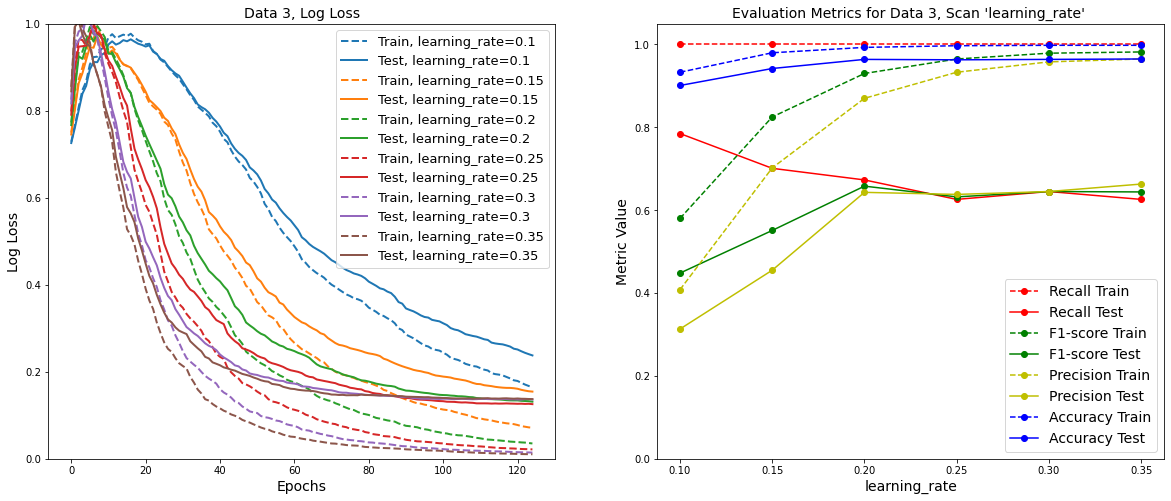

In [69]:
#Scan learning_rate, 
#'min_child_weight': 3

xgbParams = {
    'eval_metric': 'logloss', 
    'random_state': 42,
    'scale_pos_weight': 20,
    'n_estimators': 125, 
    'max_depth': 5,
    'min_child_weight': 3,
    'gamma': 0,
    #'learning_rate': 0.20,
    'subsample': 1,
}

scanParam = 'learning_rate'

scanList = [0.10, 0.15, 0.20, 0.25, 0.30, 0.35]

result_learnRate = scan_xgb_logloss_metrics(3, X_train, y_train, X_test, y_test, xgbParams, scanParam, scanList, 1, 1, 0)


**Comments**

* As learning_rate increases:
    * Overfitting increases
    * recall decreases
    * f1 and precision increases
* Optimum learning_rate=0.20, agrees with GridSearchCV.

### max_delta_step

Sample weights are used!
--------



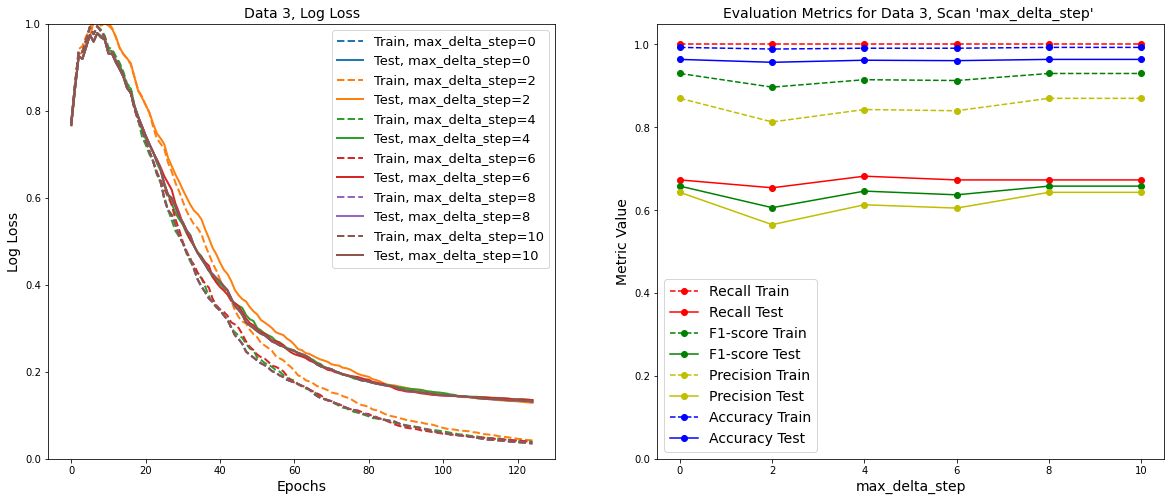

In [80]:
#Scan max_delta_step 

xgbParams = {
    'eval_metric': 'logloss', 
    'random_state': 42,
    'scale_pos_weight': 20,
    'n_estimators': 125, 
    'max_depth': 5,
    'min_child_weight': 3,
    'gamma': 0,
    'learning_rate': 0.20,
    'subsample': 1,
}

scanParam = 'max_delta_step'

scanList = [0, 2, 4, 6, 8, 10]

result_delta = scan_xgb_logloss_metrics(3, X_train, y_train, X_test, y_test, xgbParams, scanParam, scanList, 1, 1, 0)

In [81]:
result_delta

precision  recall     f1  accuracy  logloss
Params                                                                
max_delta_step=0  Train        0.870   1.000  0.930     0.993    0.035
Test                           0.643   0.673  0.658     0.964    0.131
max_delta_step=2  Train        0.813   1.000  0.897     0.989    0.042
Test                           0.565   0.654  0.606     0.957    0.128
max_delta_step=4  Train        0.843   1.000  0.915     0.991    0.039
Test                           0.613   0.682  0.646     0.962    0.134
max_delta_step=6  Train        0.840   1.000  0.913     0.991    0.039
Test                           0.605   0.673  0.637     0.961    0.135
max_delta_step=8  Train        0.870   1.000  0.930     0.993    0.035
Test                           0.643   0.673  0.658     0.964    0.131
max_delta_step=10  Train       0.870   1.000  0.930     0.993    0.035
Test                           0.643   0.673  0.658     0.964    0.131

**Comments**

* There is no significant improvement on model performance and overfitting.
* Optimum: max_delta_step=0 when learning_rate=0.20

### reg_lambda (L2)

Sample weights are used!
--------



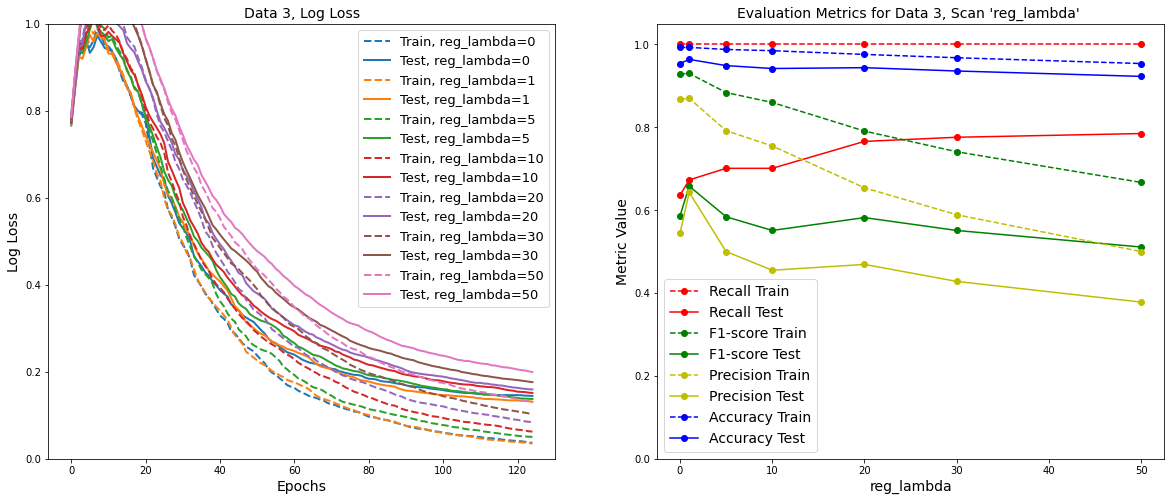

In [89]:
#Scan reg_lambda

xgbParams = {
    'eval_metric': 'logloss', 
    'random_state': 42,
    'scale_pos_weight': 20,
    'n_estimators': 125, 
    'max_depth': 5,
    'min_child_weight': 3,
    'gamma': 0,
    'learning_rate': 0.20,
    'max_delta_step': 0,
    'reg_alpha': 0,
    'subsample': 1,
}

scanParam = 'reg_lambda'

scanList = [0, 1, 5, 10, 20, 30, 50]  #default=1

result_lambda = scan_xgb_logloss_metrics(3, X_train, y_train, X_test, y_test, xgbParams, scanParam, scanList, 1, 1, 0)

In [90]:
result_lambda

precision  recall     f1  accuracy  logloss
Params                                                            
reg_lambda=0  Train        0.868   1.000  0.929     0.993    0.036
Test                       0.544   0.636  0.586     0.954    0.144
reg_lambda=1  Train        0.870   1.000  0.930     0.993    0.035
Test                       0.643   0.673  0.658     0.964    0.131
reg_lambda=5  Train        0.792   1.000  0.884     0.988    0.050
Test                       0.500   0.701  0.584     0.949    0.137
reg_lambda=10  Train       0.755   1.000  0.860     0.985    0.062
Test                       0.455   0.701  0.551     0.942    0.151
reg_lambda=20  Train       0.654   1.000  0.791     0.976    0.084
Test                       0.469   0.766  0.582     0.944    0.159
reg_lambda=30  Train       0.589   1.000  0.741     0.968    0.103
Test                       0.428   0.776  0.551     0.936    0.176
reg_lambda=50  Train       0.500   1.000  0.667     0.954    0.129
Test                       0.378   0.785  0.511     0.923    0.199

**Comments**

* For higher values of reg_lambda:
    * Overfitting decreases some
    * Recall increases
    * f1 and precision decreases significantly
* Optimum reg_lambda=1 (default)

### reg_alpha (L1)

Sample weights are used!
--------



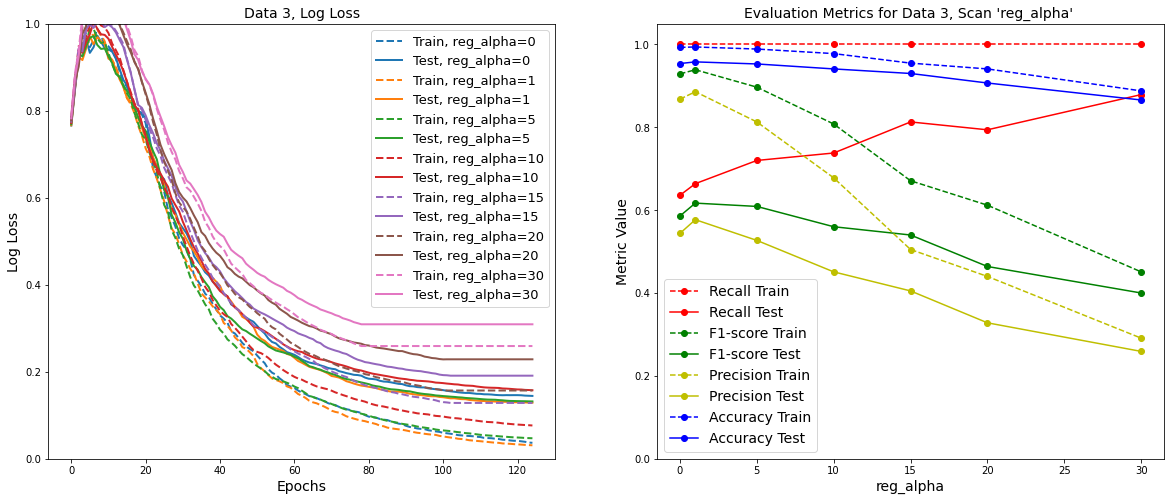

In [95]:
#Scan reg_alpha

xgbParams = {
    'eval_metric': 'logloss', 
    'random_state': 42,
    'scale_pos_weight': 20,
    'n_estimators': 125, 
    'max_depth': 5,
    'min_child_weight': 3,
    'gamma': 0,
    'learning_rate': 0.20,
    'max_delta_step': 0,
    'reg_lambda': 0,
    #'reg_alpha': 0,
    'subsample': 1,
}

scanParam = 'reg_alpha'

scanList = [0, 1, 5, 10, 15, 20, 30]

result_alpha = scan_xgb_logloss_metrics(3, X_train, y_train, X_test, y_test, xgbParams, scanParam, scanList, 1, 1, 0)

In [96]:
result_alpha

precision  recall     f1  accuracy  logloss
Params                                                           
reg_alpha=0  Train        0.868   1.000  0.929     0.993    0.036
Test                      0.544   0.636  0.586     0.954    0.144
reg_alpha=1  Train        0.886   1.000  0.939     0.994    0.031
Test                      0.577   0.664  0.617     0.958    0.129
reg_alpha=5  Train        0.813   1.000  0.897     0.989    0.047
Test                      0.527   0.720  0.609     0.953    0.132
reg_alpha=10  Train       0.678   1.000  0.808     0.978    0.076
Test                      0.451   0.738  0.560     0.941    0.157
reg_alpha=15  Train       0.505   1.000  0.671     0.955    0.128
Test                      0.405   0.813  0.540     0.930    0.191
reg_alpha=20  Train       0.440   1.000  0.612     0.941    0.157
Test                      0.328   0.794  0.464     0.907    0.228
reg_alpha=30  Train       0.291   1.000  0.451     0.888    0.259
Test                      0.259   0.879  0.400     0.866    0.309

**Comments**

* For higher values of reg_alpha:
    * The overfitting decreases significantly for all metrics
    * Recall increases
    * f1 and precision decreases significantly
* Optimum reg_alpha=5 (better than performance with reg_lambda=1)


### Model 6: Model after Regularization

In [13]:
# Model 6: Model after Regularization

xgbParams = {
    'eval_metric': 'logloss', 
    'random_state': 42,
    'scale_pos_weight': 20,
    'n_estimators': 125, 
    'max_depth': 5,
    'min_child_weight': 3,
    'gamma': 0,
    'learning_rate': 0.20,
    'max_delta_step': 0,
    'reg_lambda': 0,
    'reg_alpha': 5,
    'subsample': 1,
}

model_6 = xgb_model_report(3, X_train, y_train, X_test, y_test, xgbParams, 'model_6', 1, 1, 1)


Sample weights are used!
--------

Data 3 Classification Report:

Training Data:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      8014
           1       0.81      1.00      0.90       388

    accuracy                           0.99      8402
   macro avg       0.91      0.99      0.95      8402
weighted avg       0.99      0.99      0.99      8402

Testing Data:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97      1994
           1       0.53      0.72      0.61       107

    accuracy                           0.95      2101
   macro avg       0.76      0.84      0.79      2101
weighted avg       0.96      0.95      0.96      2101



In [98]:
model_6.get_params

<bound method XGBModel.get_params of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.2, max_delta_step=0,
              max_depth=5, min_child_weight=3, missing=nan,
              monotone_constraints='()', n_estimators=125, n_jobs=4,
              num_parallel_tree=1, random_state=42, reg_alpha=5, reg_lambda=0,
              scale_pos_weight=20, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)>

precision  recall     f1  accuracy    auc
Params                                                    
Model 1  Train       1.000   1.000  1.000     1.000  1.000
Test                 0.926   0.467  0.621     0.971  0.941
Model 2  Train       0.990   1.000  0.995     1.000  1.000
Test                 0.677   0.607  0.640     0.965  0.916
Model 3  Train       0.956   1.000  0.977     0.998  1.000
Test                 0.645   0.645  0.645     0.964  0.922
Model 4  Train       0.902   1.000  0.949     0.995  1.000
Test                 0.602   0.692  0.643     0.961  0.921
Model 5  Train       0.870   1.000  0.930     0.993  1.000
Test                 0.643   0.673  0.658     0.964  0.913
Model 6  Train       0.813   1.000  0.897     0.989  1.000
Test                 0.527   0.720  0.609     0.953  0.932

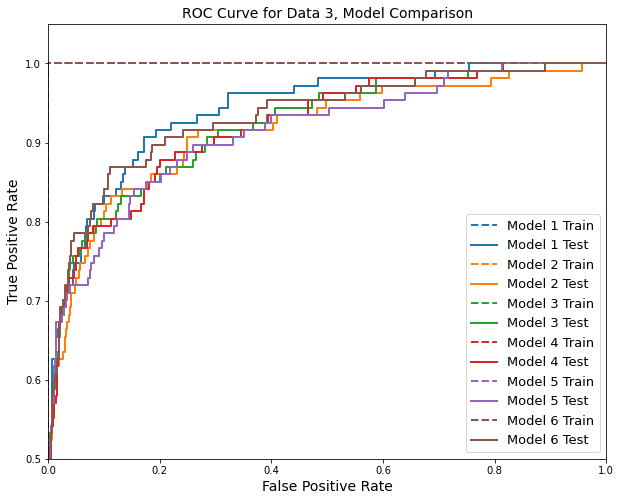

In [14]:
model_list = [model_1, model_2, model_3, model_4, model_5, model_6]
model_names_list = ['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5', 'Model 6']

compare_models(3, X_train, y_train, X_test, y_test, model_list, model_names_list, 'Model_l-6', 1, 1)

**Comments**
* Model performance is improved.
* recall and AUC increased significantly.
* f1 and precision decreased.
* Overfitting decreased.

## Sampling Parameters Tuning

### subsample

Sample weights are used!
--------



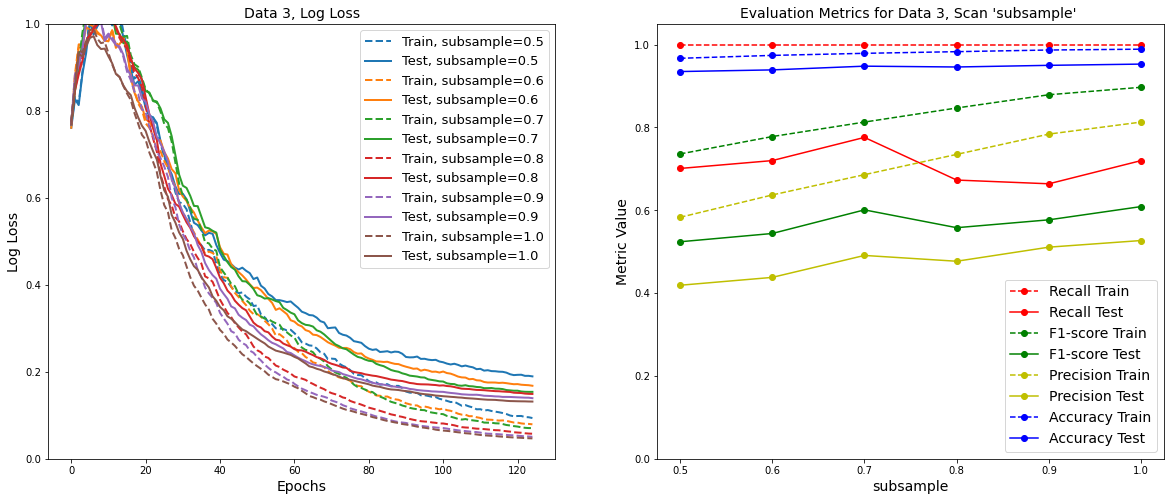

In [101]:
#Scan subsample

xgbParams = {
    'eval_metric': 'logloss', 
    'random_state': 42,
    'scale_pos_weight': 20,
    'n_estimators': 125, 
    'max_depth': 5,
    'min_child_weight': 3,
    'gamma': 0,
    'learning_rate': 0.20,
    'max_delta_step': 0,
    'reg_lambda': 0,
    'reg_alpha': 5,
    #'subsample': 1,
}

scanParam = 'subsample'

scanList = [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

result_subsample = scan_xgb_logloss_metrics(3, X_train, y_train, X_test, y_test, xgbParams, scanParam, scanList, 1, 1, 0)


In [102]:
result_subsample

precision  recall     f1  accuracy  logloss
Params                                                            
subsample=0.5  Train       0.583   1.000  0.736     0.967    0.094
Test                       0.419   0.701  0.524     0.935    0.190
subsample=0.6  Train       0.637   1.000  0.778     0.974    0.079
Test                       0.438   0.720  0.544     0.939    0.168
subsample=0.7  Train       0.686   1.000  0.813     0.979    0.071
Test                       0.491   0.776  0.601     0.948    0.154
subsample=0.8  Train       0.735   1.000  0.847     0.983    0.058
Test                       0.477   0.673  0.558     0.946    0.149
subsample=0.9  Train       0.784   1.000  0.879     0.987    0.051
Test                       0.511   0.664  0.577     0.950    0.139
subsample=1.0  Train       0.813   1.000  0.897     0.989    0.047
Test                       0.527   0.720  0.609     0.953    0.132

**Comments**

* Overfitting is larger at higher values of subsample
* Optimum: subsample=0.7

### colsample_bytree

Sample weights are used!
--------



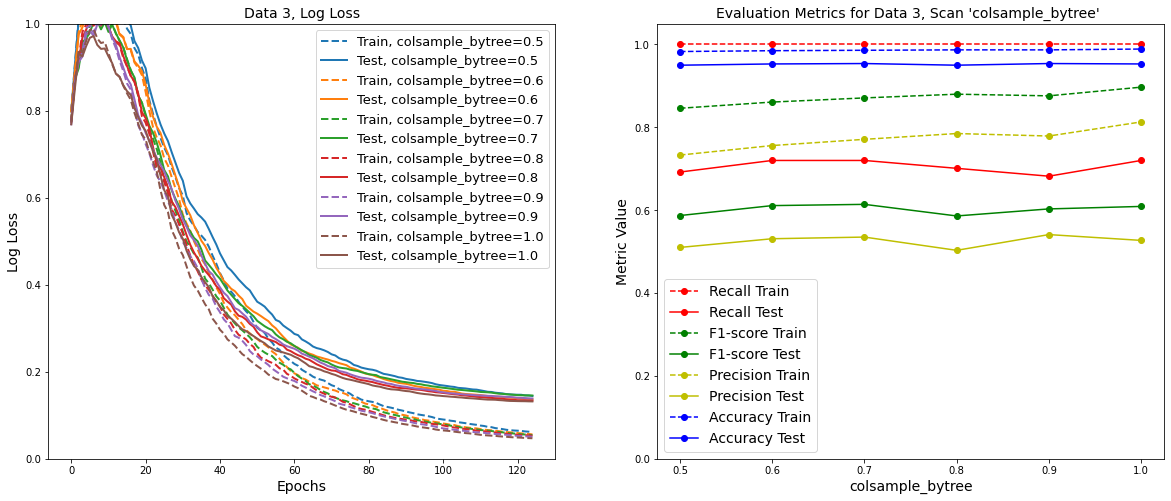

In [103]:
#Scan colsample_bytree

xgbParams = {
    'eval_metric': 'logloss', 
    'random_state': 42,
    'scale_pos_weight': 20,
    'n_estimators': 125, 
    'max_depth': 5,
    'min_child_weight': 3,
    'gamma': 0,
    'learning_rate': 0.20,
    'max_delta_step': 0,
    'reg_lambda': 0,
    'reg_alpha': 5,
    'subsample': 1,
}

scanParam = 'colsample_bytree'

scanList = [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

result_colsample = scan_xgb_logloss_metrics(3, X_train, y_train, X_test, y_test, xgbParams, scanParam, scanList, 1, 1, 0)


In [104]:
result_colsample

precision  recall     f1  accuracy  logloss
Params                                                                   
colsample_bytree=0.5  Train       0.733   1.000  0.846     0.983    0.061
Test                              0.510   0.692  0.587     0.950    0.144
colsample_bytree=0.6  Train       0.756   1.000  0.861     0.985    0.056
Test                              0.531   0.720  0.611     0.953    0.137
colsample_bytree=0.7  Train       0.771   1.000  0.871     0.986    0.054
Test                              0.535   0.720  0.614     0.954    0.145
colsample_bytree=0.8  Train       0.785   1.000  0.880     0.987    0.053
Test                              0.503   0.701  0.586     0.950    0.134
colsample_bytree=0.9  Train       0.779   1.000  0.876     0.987    0.050
Test                              0.541   0.682  0.603     0.954    0.138
colsample_bytree=1.0  Train       0.813   1.000  0.897     0.989    0.047
Test                              0.527   0.720  0.609     0.953    0.132

**Comments**

* colsample_bytree has no significant effect on model performance
* overfitting decreases very sligtly at lower values
* Optimum: colsample_bytree=0.7

### Model 7: Model after Sampling

In [12]:
#Model 7: Model after Sampling

xgbParams = {
    'eval_metric': 'logloss', 
    'random_state': 42,
    'scale_pos_weight': 20,
    'n_estimators': 125, 
    'max_depth': 5,
    'min_child_weight': 3,
    'gamma': 0,
    'learning_rate': 0.20,
    'max_delta_step': 0,
    'reg_lambda': 0,
    'reg_alpha': 5,
    'subsample': 1,
    'colsample_bytree': 0.7
}

model_7 = xgb_model_report(3, X_train, y_train, X_test, y_test, xgbParams, 'model_7', 1, 1, 1)


Sample weights are used!
Data 3 Classification Report:

Training Data:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      8014
           1       0.77      1.00      0.87       388

    accuracy                           0.99      8402
   macro avg       0.89      0.99      0.93      8402
weighted avg       0.99      0.99      0.99      8402

Testing Data:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98      1994
           1       0.53      0.72      0.61       107

    accuracy                           0.95      2101
   macro avg       0.76      0.84      0.79      2101
weighted avg       0.96      0.95      0.96      2101



In [106]:
model_7.get_params

<bound method XGBModel.get_params of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.2, max_delta_step=0,
              max_depth=5, min_child_weight=3, missing=nan,
              monotone_constraints='()', n_estimators=125, n_jobs=4,
              num_parallel_tree=1, random_state=42, reg_alpha=5, reg_lambda=0,
              scale_pos_weight=20, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)>

precision  recall     f1  accuracy    auc
Params                                                    
Model 1  Train       1.000   1.000  1.000     1.000  1.000
Test                 0.926   0.467  0.621     0.971  0.941
Model 2  Train       0.990   1.000  0.995     1.000  1.000
Test                 0.677   0.607  0.640     0.965  0.916
Model 3  Train       0.956   1.000  0.977     0.998  1.000
Test                 0.645   0.645  0.645     0.964  0.922
Model 4  Train       0.902   1.000  0.949     0.995  1.000
Test                 0.602   0.692  0.643     0.961  0.921
Model 5  Train       0.870   1.000  0.930     0.993  1.000
Test                 0.643   0.673  0.658     0.964  0.913
Model 6  Train       0.813   1.000  0.897     0.989  1.000
Test                 0.527   0.720  0.609     0.953  0.932
Model 7  Train       0.771   1.000  0.871     0.986  1.000
Test                 0.535   0.720  0.614     0.954  0.923

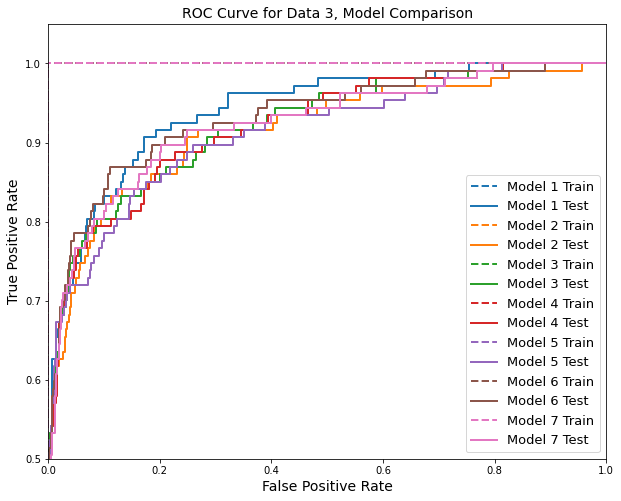

In [16]:
model_list = [model_1, model_2, model_3, model_4, model_5, model_6, model_7]
model_names_list = ['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5', 'Model 6', 'Model 7']

compare_models(3, X_train, y_train, X_test, y_test, model_list, model_names_list, 'Model_l-7', 1, 1)

**Comments**
* Overfitting decreased.
* recall stays same, but f1 and precision increased.

## Modeling at max_depth=4

I would like to see if I can decrease the overfitting at max_depth=4.

I use the optimized class imbalance method for max_depth=4: 
* sample_weight + scale_pos_weight=4.5

In [23]:
# Model at max_depth=4, 
# class balanced

xgbParams = {
    'eval_metric': 'logloss', 
    'random_state': 42,
    'scale_pos_weight': 4.5,
    'n_estimators': 150,
    'max_depth': 4,
}

model_depth4 = xgb_model_report(3, X_train, y_train, X_test, y_test, xgbParams, 'model_depth4', 1, 0, 1)


Sample weights are used!
--------

Data 3 Classification Report:

Training Data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      8014
           1       0.96      1.00      0.98       388

    accuracy                           1.00      8402
   macro avg       0.98      1.00      0.99      8402
weighted avg       1.00      1.00      1.00      8402

Testing Data:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      1994
           1       0.71      0.61      0.65       107

    accuracy                           0.97      2101
   macro avg       0.84      0.80      0.82      2101
weighted avg       0.97      0.97      0.97      2101



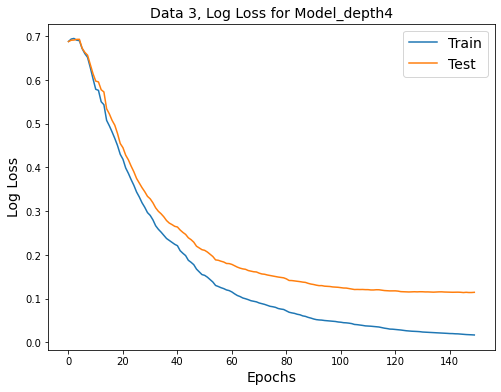

In [24]:
plot_logloss(3, model_depth4, 'Model_depth4', 0)

### Boosting Rounds at max_depth=4

Sample weights are used!
--------



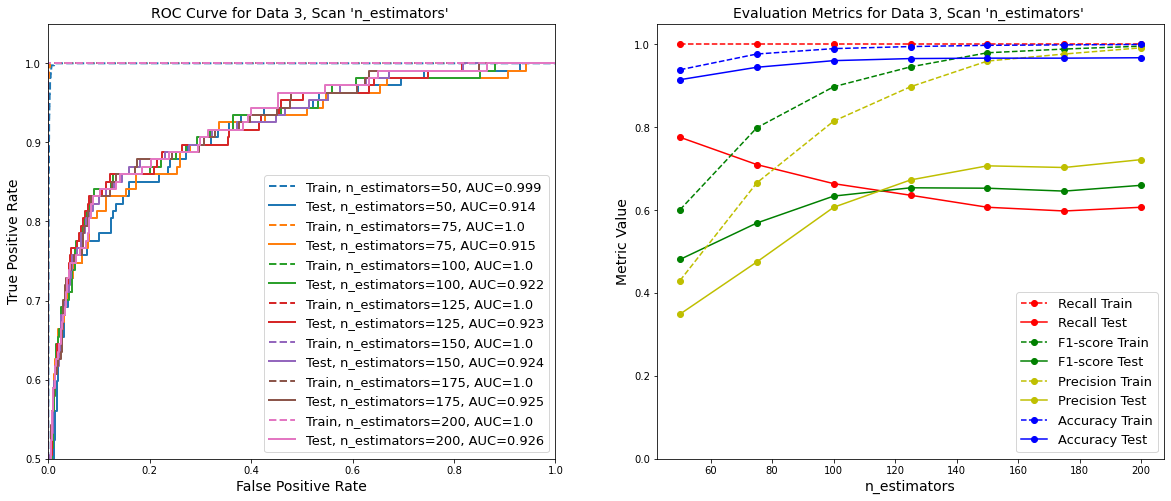

In [35]:
# Scan n_estimator
#max_depth=4

xgbParams = {
    'eval_metric': 'logloss', 
    'random_state': 42,
    'scale_pos_weight': 4.5,
    'max_depth': 4,
}

scanParam = 'n_estimators'

scanList = [50, 75, 100, 125, 150, 175, 200]

results_est_dep4 = scan_xgb_ROC_metrics(3, X_train, y_train, X_test, y_test, xgbParams, scanParam, scanList, 1, 1, 0)


In [25]:
# Model at max_depth=4
# 'n_estimators': 100

xgbParams = {
    'eval_metric': 'logloss', 
    'random_state': 42,
    'scale_pos_weight': 4.5,
    'n_estimators': 100, #default
    'max_depth': 4,
}

model_depth4 = xgb_model_report(3, X_train, y_train, X_test, y_test, xgbParams, 'model_depth4', 1, 0, 1)

Sample weights are used!
--------

Data 3 Classification Report:

Training Data:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      8014
           1       0.82      1.00      0.90       388

    accuracy                           0.99      8402
   macro avg       0.91      0.99      0.95      8402
weighted avg       0.99      0.99      0.99      8402

Testing Data:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1994
           1       0.61      0.66      0.63       107

    accuracy                           0.96      2101
   macro avg       0.79      0.82      0.81      2101
weighted avg       0.96      0.96      0.96      2101



### Pruning at max_depth=4

Sample weights are used!
--------



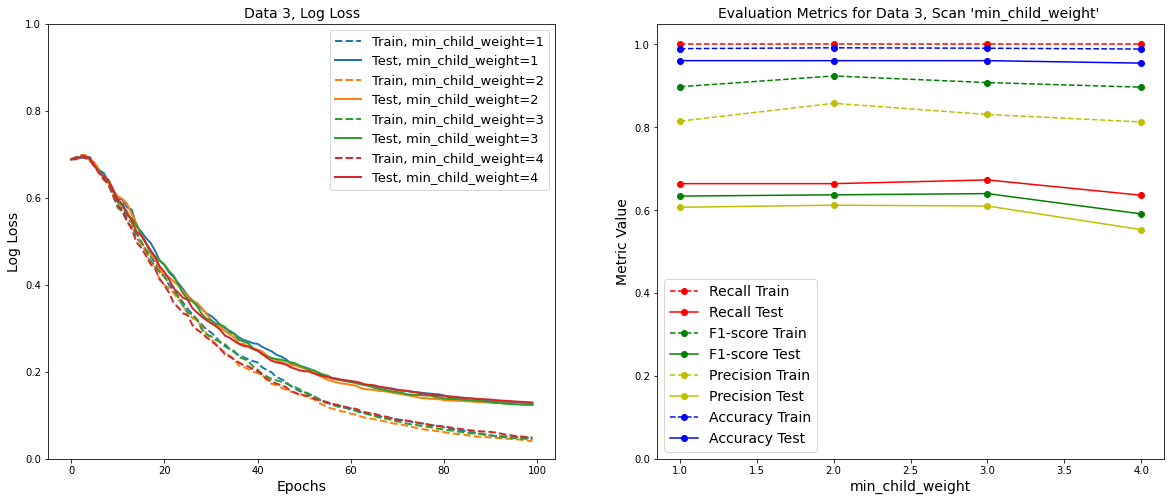

In [26]:
#Scan min_child_weight

xgbParams = {
    'eval_metric': 'logloss', 
    'random_state': 42,
    'scale_pos_weight': 4.5,
    'n_estimators': 100, 
    'max_depth': 4,

}

scanParam = 'min_child_weight'

scanList = [1, 2, 3, 4]

result_child_dep4 = scan_xgb_logloss_metrics(3, X_train, y_train, X_test, y_test, xgbParams, scanParam, scanList, 1, 1, 0)


In [27]:
result_child_dep4

precision  recall     f1  accuracy  logloss
Params                                                                 
min_child_weight=1  Train       0.815   1.000  0.898     0.990    0.047
Test                            0.607   0.664  0.634     0.961    0.126
min_child_weight=2  Train       0.858   1.000  0.924     0.992    0.040
Test                            0.612   0.664  0.637     0.961    0.124
min_child_weight=3  Train       0.831   1.000  0.908     0.991    0.045
Test                            0.610   0.673  0.640     0.961    0.124
min_child_weight=4  Train       0.813   1.000  0.897     0.989    0.048
Test                            0.553   0.636  0.591     0.955    0.129

In [28]:
# Model at max_depth=4,
# 'min_child_weight': 3

xgbParams = {
    'eval_metric': 'logloss', 
    'random_state': 42,
    'scale_pos_weight': 4.5,
    'n_estimators': 100, #default
    'max_depth': 4,
    'min_child_weight': 3
}

model_depth4 = xgb_model_report(3, X_train, y_train, X_test, y_test, xgbParams, 'model_depth4', 1, 0, 1)

Sample weights are used!
--------

Data 3 Classification Report:

Training Data:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      8014
           1       0.83      1.00      0.91       388

    accuracy                           0.99      8402
   macro avg       0.92      1.00      0.95      8402
weighted avg       0.99      0.99      0.99      8402

Testing Data:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1994
           1       0.61      0.67      0.64       107

    accuracy                           0.96      2101
   macro avg       0.80      0.82      0.81      2101
weighted avg       0.96      0.96      0.96      2101



Sample weights are used!
--------



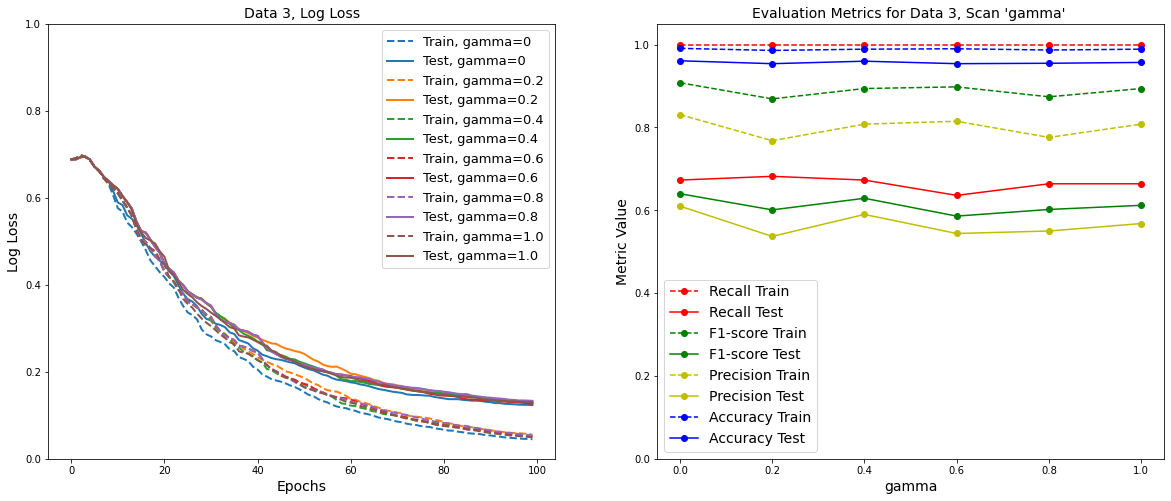

In [29]:
#Scan gamma

xgbParams = {
    'eval_metric': 'logloss', 
    'random_state': 42,
    'scale_pos_weight': 4.5,
    'n_estimators': 100, 
    'max_depth': 4,
    'min_child_weight': 3,
}

scanParam = 'gamma'

scanList = [0, 0.2, 0.4, 0.6, 0.8, 1.0]

result_gamma_dep4 = scan_xgb_logloss_metrics(3, X_train, y_train, X_test, y_test, xgbParams, scanParam, scanList, 1, 1, 0)


### Model 8: Model with max_depth=4 after tuning pruning and booster rounds

In [17]:
#Model 8: Model with max_depth=4 after tuning pruning and booster rounds

xgbParams = {
    'eval_metric': 'logloss', 
    'random_state': 42,
    'scale_pos_weight': 4.5,
    'n_estimators': 100, 
    'max_depth': 4,
    'min_child_weight': 3,
    'gamma': 0,
}

model_8 = xgb_model_report(3, X_train, y_train, X_test, y_test, xgbParams, 'model_8', 1, 1, 1)

Sample weights are used!
--------

Data 3 Classification Report:

Training Data:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      8014
           1       0.83      1.00      0.91       388

    accuracy                           0.99      8402
   macro avg       0.92      1.00      0.95      8402
weighted avg       0.99      0.99      0.99      8402

Testing Data:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1994
           1       0.61      0.67      0.64       107

    accuracy                           0.96      2101
   macro avg       0.80      0.82      0.81      2101
weighted avg       0.96      0.96      0.96      2101



In [64]:
model_8.get_params

<bound method XGBModel.get_params of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=4, min_child_weight=3, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, random_state=42, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=4.5, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)>

precision  recall     f1  accuracy    auc
Params                                                    
Model 2  Train       0.990   1.000  0.995     1.000  1.000
Test                 0.677   0.607  0.640     0.965  0.916
Model 5  Train       0.870   1.000  0.930     0.993  1.000
Test                 0.643   0.673  0.658     0.964  0.913
Model 7  Train       0.771   1.000  0.871     0.986  1.000
Test                 0.535   0.720  0.614     0.954  0.923
Model 8  Train       0.831   1.000  0.908     0.991  1.000
Test                 0.610   0.673  0.640     0.961  0.930

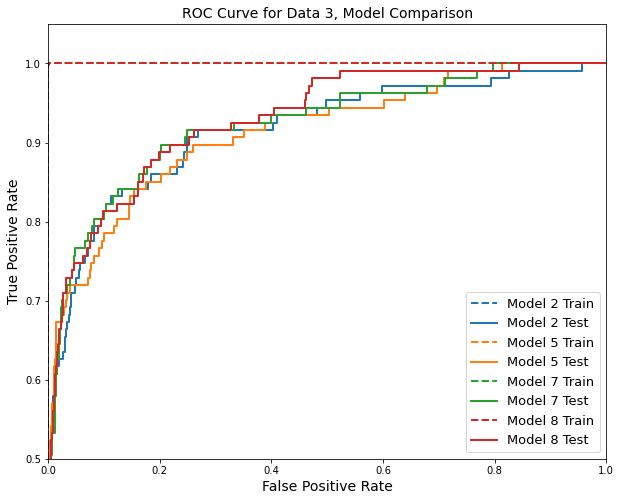

In [18]:
model_list = [model_2, model_5, model_7, model_8]
model_names_list = ['Model 2', 'Model 5', 'Model 7', 'Model 8']

compare_models(3, X_train, y_train, X_test, y_test, model_list, model_names_list, 'Model_l578', 1, 1)

### Regularization at max_depth=4

Sample weights are used!
--------



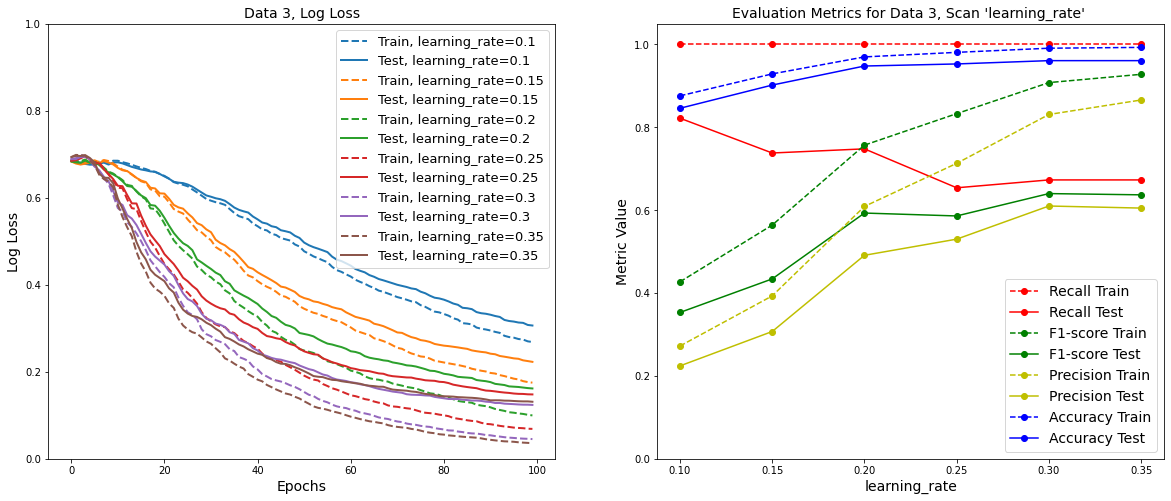

In [32]:
#Scan learning_rate, 

xgbParams = {
    'eval_metric': 'logloss', 
    'random_state': 42,
    'scale_pos_weight': 4.5,
    'n_estimators': 100, 
    'max_depth': 4,
    'min_child_weight': 3,
    'gamma': 0,
}

scanParam = 'learning_rate'

scanList = [0.10, 0.15, 0.20, 0.25, 0.30, 0.35]

result_learnRate_dep4 = scan_xgb_logloss_metrics(3, X_train, y_train, X_test, y_test, xgbParams, scanParam, scanList, 1, 1, 0)


In [39]:
result_learnRate_dep4

precision  recall     f1  accuracy  logloss
Params                                                                 
learning_rate=0.1  Train        0.272   1.000  0.427     0.876    0.268
Test                            0.224   0.822  0.353     0.846    0.306
learning_rate=0.15  Train       0.393   1.000  0.564     0.929    0.175
Test                            0.307   0.738  0.434     0.902    0.223
learning_rate=0.2  Train        0.609   1.000  0.757     0.970    0.099
Test                            0.491   0.748  0.593     0.948    0.161
learning_rate=0.25  Train       0.713   1.000  0.833     0.981    0.068
Test                            0.530   0.654  0.586     0.953    0.148
learning_rate=0.3  Train        0.831   1.000  0.908     0.991    0.045
Test                            0.610   0.673  0.640     0.961    0.124
learning_rate=0.35  Train       0.866   1.000  0.928     0.993    0.036
Test                            0.605   0.673  0.637     0.961    0.131

Sample weights are used!
--------



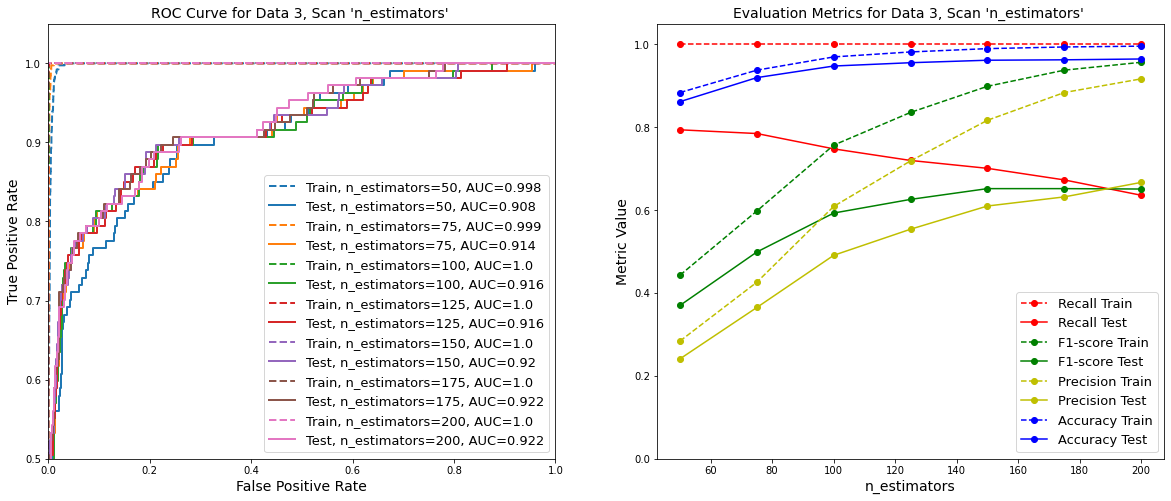

In [34]:
# Scan n_estimator
#max_depth=4, learning_rate=0.20

xgbParams = {
    'eval_metric': 'logloss', 
    'random_state': 42,
    'scale_pos_weight': 4.5,
    'max_depth': 4,
    'min_child_weight': 3,
    'gamma': 0,
    'learning_rate': 0.20
}

scanParam = 'n_estimators'

scanList = [50, 75, 100, 125, 150, 175, 200]

results_est_dep4_2 = scan_xgb_ROC_metrics(3, X_train, y_train, X_test, y_test, xgbParams, scanParam, scanList, 1, 1, 0)


In [37]:
results_est_dep4_2

precision  recall     f1  accuracy    auc  \
Params                                                                
n_estimators=50  Train        0.284   1.000  0.443     0.884  0.998   
Test                          0.241   0.794  0.370     0.862  0.908   
n_estimators=75  Train        0.426   1.000  0.598     0.938  0.999   
Test                          0.365   0.785  0.499     0.920  0.914   
n_estimators=100  Train       0.609   1.000  0.757     0.970  1.000   
Test                          0.491   0.748  0.593     0.948  0.916   
n_estimators=125  Train       0.719   1.000  0.836     0.982  1.000   
Test                          0.554   0.720  0.626     0.956  0.916   
n_estimators=150  Train       0.817   1.000  0.899     0.990  1.000   
Test                          0.610   0.701  0.652     0.962  0.920   
n_estimators=175  Train       0.884   1.000  0.938     0.994  1.000   
Test                          0.632   0.673  0.652     0.963  0.922   
n_estimators=200  Train       0.917   1.000  0.957     0.996  1.000   
Test                          0.667   0.636  0.651     0.965  0.922   

                          prec_diff_sc  rec_diff_sc  f1_diff_sc  \
Params                                                            
n_estimators=50  Train        0.178423     0.259446    0.197297   
Test                               NaN          NaN         NaN   
n_estimators=75  Train        0.167123     0.273885    0.198397   
Test                               NaN          NaN         NaN   
n_estimators=100  Train       0.240326     0.336898    0.276560   
Test                               NaN          NaN         NaN   
n_estimators=125  Train       0.297834     0.388889    0.335463   
Test                               NaN          NaN         NaN   
n_estimators=150  Train       0.339344     0.426534    0.378834   
Test                               NaN          NaN         NaN   
n_estimators=175  Train       0.398734     0.485884    0.438650   
Test                               NaN          NaN         NaN   
n_estimators=200  Train       0.374813     0.572327    0.470046   
Test                               NaN          NaN         NaN   

                          overfit_measure  
Params                                     
n_estimators=50  Train           0.211722  
Test                                  NaN  
n_estimators=75  Train           0.213135  
Test                                  NaN  
n_estimators=100  Train          0.284595  
Test                                  NaN  
n_estimators=125  Train          0.340729  
Test                                  NaN  
n_estimators=150  Train          0.381571  
Test                                  NaN  
n_estimators=175  Train          0.441090  
Test                                  NaN  
n_estimators=200  Train          0.472395  
Test                                  NaN

In [41]:
# Model at max_depth=4,
# 'learning_rate': 0.20,
# 'n_estimators': 125

xgbParams = {
    'eval_metric': 'logloss', 
    'random_state': 42,
    'scale_pos_weight': 4.5,
    'n_estimators': 125, 
    'max_depth': 4,
    'min_child_weight': 3,
    'learning_rate': 0.20
}

model_depth4 = xgb_model_report(3, X_train, y_train, X_test, y_test, xgbParams, 'model_depth4', 1, 0, 1)

Sample weights are used!
--------

Data 3 Classification Report:

Training Data:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99      8014
           1       0.72      1.00      0.84       388

    accuracy                           0.98      8402
   macro avg       0.86      0.99      0.91      8402
weighted avg       0.99      0.98      0.98      8402

Testing Data:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98      1994
           1       0.55      0.72      0.63       107

    accuracy                           0.96      2101
   macro avg       0.77      0.84      0.80      2101
weighted avg       0.96      0.96      0.96      2101



Sample weights are used!
--------



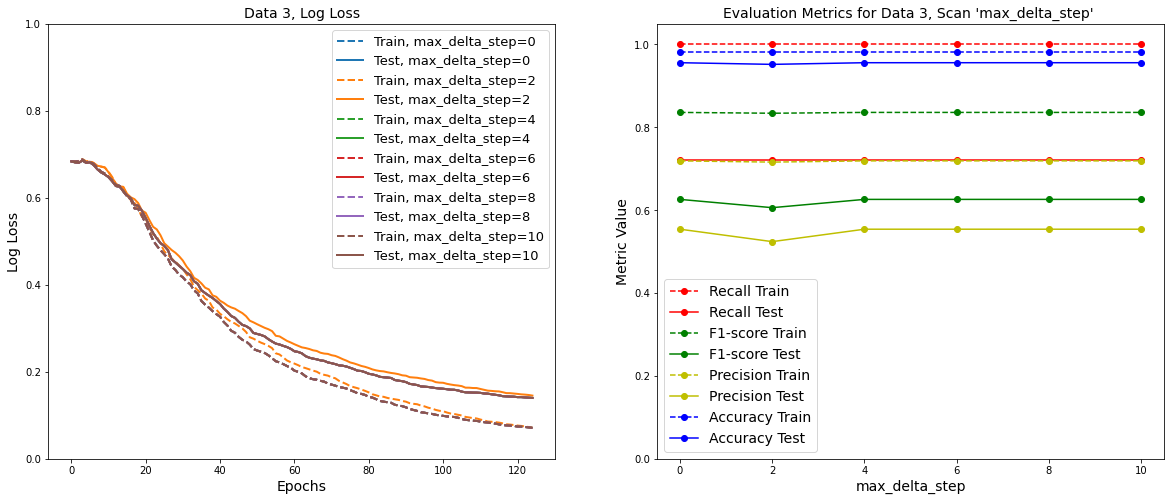

In [43]:
#Scan max_delta_step 
#max_depth=4

xgbParams = {
    'eval_metric': 'logloss', 
    'random_state': 42,
    'scale_pos_weight': 4.5,
    'n_estimators': 125, 
    'max_depth': 4,
    'min_child_weight': 3,
    'gamma': 0,
    'learning_rate': 0.20,
}

scanParam = 'max_delta_step'

scanList = [0, 2, 4, 6, 8, 10]

result_delta_dep4 = scan_xgb_logloss_metrics(3, X_train, y_train, X_test, y_test, xgbParams, scanParam, scanList, 1, 1, 0)



Sample weights are used!
--------



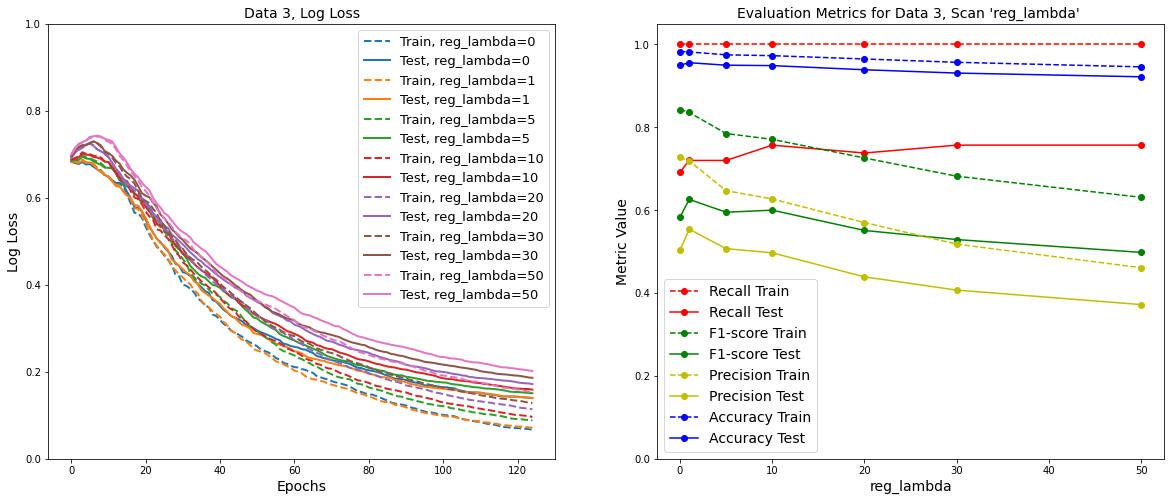

In [45]:
#Scan reg_lambda
#max_depth=4
#'max_delta_step': 0,

xgbParams = {
    'eval_metric': 'logloss', 
    'random_state': 42,
    'scale_pos_weight': 4.5,
    'n_estimators': 125, 
    'max_depth': 4,
    'min_child_weight': 3,
    'gamma': 0,
    'learning_rate': 0.20,
    'max_delta_step': 0,
    'reg_alpha': 0,
}

scanParam = 'reg_lambda'

scanList = [0, 1, 5, 10, 20, 30, 50]  #default=1

result_lambda_dep4 = scan_xgb_logloss_metrics(3, X_train, y_train, X_test, y_test, xgbParams, scanParam, scanList, 1, 1, 0)



In [47]:
result_lambda_dep4

precision  recall     f1  accuracy  logloss
Params                                                            
reg_lambda=0  Train        0.728   1.000  0.843     0.983    0.066
Test                       0.503   0.692  0.583     0.950    0.139
reg_lambda=1  Train        0.719   1.000  0.836     0.982    0.071
Test                       0.554   0.720  0.626     0.956    0.140
reg_lambda=5  Train        0.647   1.000  0.785     0.975    0.088
Test                       0.507   0.720  0.595     0.950    0.150
reg_lambda=10  Train       0.627   1.000  0.771     0.973    0.096
Test                       0.497   0.757  0.600     0.949    0.159
reg_lambda=20  Train       0.570   1.000  0.726     0.965    0.113
Test                       0.439   0.738  0.551     0.939    0.171
reg_lambda=30  Train       0.518   1.000  0.682     0.957    0.127
Test                       0.407   0.757  0.529     0.931    0.186
reg_lambda=50  Train       0.461   1.000  0.631     0.946    0.153
Test                       0.372   0.757  0.498     0.922    0.202

Sample weights are used!
--------



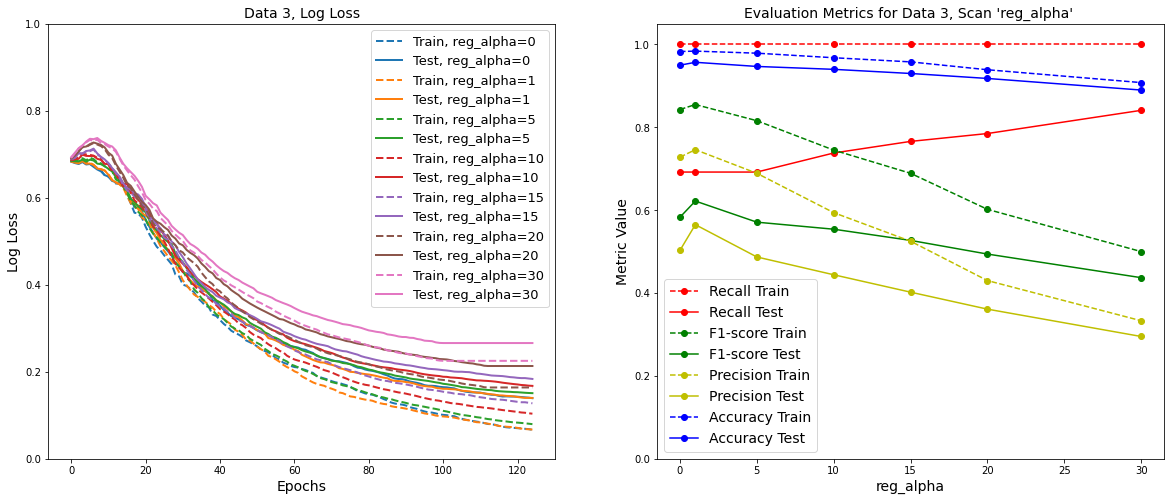

In [46]:
#Scan reg_alpha
#max_depth=4

xgbParams = {
    'eval_metric': 'logloss', 
    'random_state': 42,
    'scale_pos_weight': 4.5,
    'n_estimators': 125, 
    'max_depth': 4,
    'min_child_weight': 3,
    'gamma': 0,
    'learning_rate': 0.20,
    'max_delta_step': 0,
    'reg_lambda': 0,
}

scanParam = 'reg_alpha'

scanList = [0, 1, 5, 10, 15, 20, 30]  #default 0 

result_alpha_dep4 = scan_xgb_logloss_metrics(3, X_train, y_train, X_test, y_test, xgbParams, scanParam, scanList, 1, 1, 0)



In [48]:
result_alpha_dep4

precision  recall     f1  accuracy  logloss
Params                                                           
reg_alpha=0  Train        0.728   1.000  0.843     0.983    0.066
Test                      0.503   0.692  0.583     0.950    0.139
reg_alpha=1  Train        0.746   1.000  0.855     0.984    0.067
Test                      0.565   0.692  0.622     0.957    0.140
reg_alpha=5  Train        0.689   1.000  0.816     0.979    0.079
Test                      0.487   0.692  0.571     0.947    0.151
reg_alpha=10  Train       0.594   1.000  0.745     0.968    0.103
Test                      0.444   0.738  0.554     0.940    0.167
reg_alpha=15  Train       0.525   1.000  0.689     0.958    0.127
Test                      0.402   0.766  0.527     0.930    0.183
reg_alpha=20  Train       0.430   1.000  0.602     0.939    0.164
Test                      0.361   0.785  0.494     0.918    0.213
reg_alpha=30  Train       0.333   1.000  0.500     0.908    0.225
Test                      0.295   0.841  0.437     0.890    0.266

In [49]:
#Model at max_depth=4

xgbParams = {
    'eval_metric': 'logloss', 
    'random_state': 42,
    'scale_pos_weight': 4.5,
    'n_estimators': 125, 
    'max_depth': 4,
    'min_child_weight': 3,
    'gamma': 0,
    'learning_rate': 0.20,
    'max_delta_step': 0,
    'reg_lambda': 1,
    'reg_alpha': 0,
}

model_depth4 = xgb_model_report(3, X_train, y_train, X_test, y_test, xgbParams, 'model_depth4', 1, 0, 1)


Sample weights are used!
--------

Data 3 Classification Report:

Training Data:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99      8014
           1       0.72      1.00      0.84       388

    accuracy                           0.98      8402
   macro avg       0.86      0.99      0.91      8402
weighted avg       0.99      0.98      0.98      8402

Testing Data:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98      1994
           1       0.55      0.72      0.63       107

    accuracy                           0.96      2101
   macro avg       0.77      0.84      0.80      2101
weighted avg       0.96      0.96      0.96      2101



### Sampling at max_depth=4

Sample weights are used!
--------



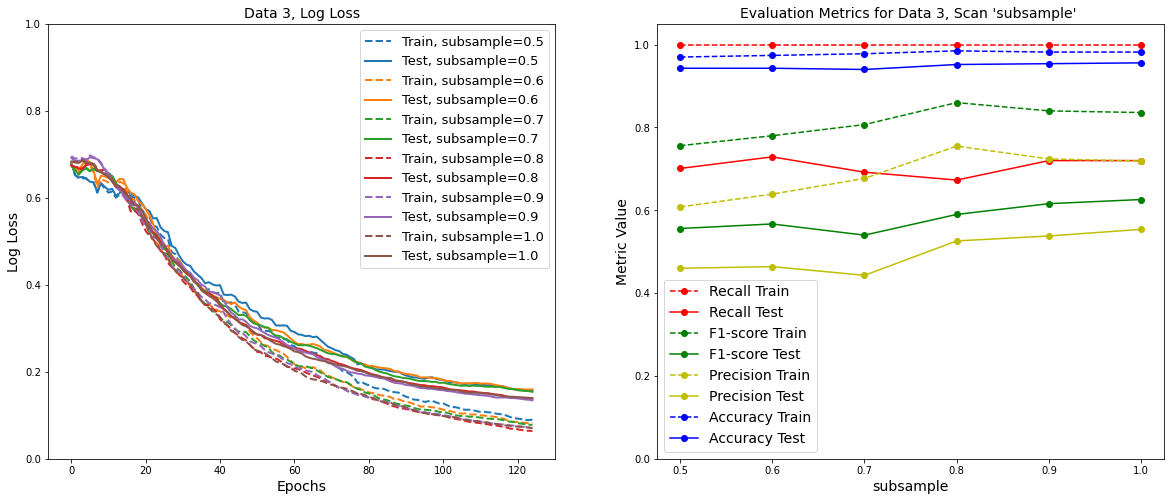

In [86]:
#Scan subsample
#max_depth=4

xgbParams = {
    'eval_metric': 'logloss', 
    'random_state': 42,
    'scale_pos_weight': 4.5,
    'n_estimators': 125, 
    'max_depth': 4,
    'min_child_weight': 3,
    'gamma': 0,
    'learning_rate': 0.20,
    'max_delta_step': 0,
    'reg_lambda': 1,
    'reg_alpha': 0,
}

scanParam = 'subsample'

scanList = [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

result_subsample_dep4 = scan_xgb_logloss_metrics(3, X_train, y_train, X_test, y_test, xgbParams, scanParam, scanList, 1, 1, 0)



Sample weights are used!
--------



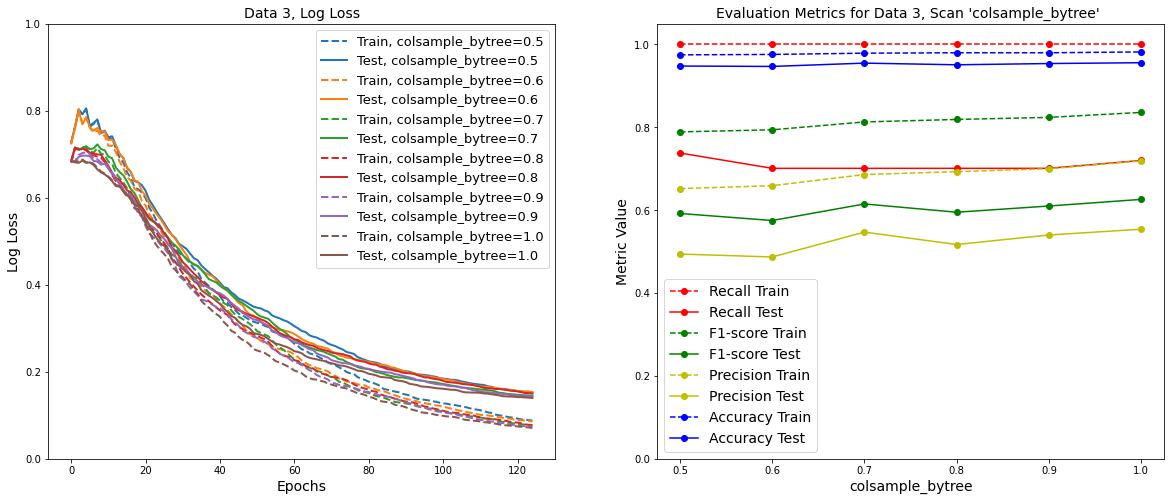

In [53]:
#Scan colsample_bytree
#max_depth=4

xgbParams = {
    'eval_metric': 'logloss', 
    'random_state': 42,
    'scale_pos_weight': 4.5,
    'n_estimators': 125, 
    'max_depth': 4,
    'min_child_weight': 3,
    'gamma': 0,
    'learning_rate': 0.20,
    'max_delta_step': 0,
    'reg_lambda': 1,
    'reg_alpha': 0,
    'subsample': 1,
}

scanParam = 'colsample_bytree'

scanList = [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

result_colsample_dep4 = scan_xgb_logloss_metrics(3, X_train, y_train, X_test, y_test, xgbParams, scanParam, scanList, 1, 1, 0)


In [54]:
result_colsample_dep4

precision  recall     f1  accuracy  logloss
Params                                                                   
colsample_bytree=0.5  Train       0.652   1.000  0.789     0.975    0.088
Test                              0.494   0.738  0.592     0.948    0.152
colsample_bytree=0.6  Train       0.659   1.000  0.794     0.976    0.085
Test                              0.487   0.701  0.575     0.947    0.153
colsample_bytree=0.7  Train       0.686   1.000  0.813     0.979    0.077
Test                              0.547   0.701  0.615     0.955    0.145
colsample_bytree=0.8  Train       0.693   1.000  0.819     0.980    0.077
Test                              0.517   0.701  0.595     0.951    0.150
colsample_bytree=0.9  Train       0.700   1.000  0.824     0.980    0.073
Test                              0.540   0.701  0.610     0.954    0.143
colsample_bytree=1.0  Train       0.719   1.000  0.836     0.982    0.071
Test                              0.554   0.720  0.626     0.956    0.140

### Model 9: Model with max_depth=4, after regularization and samppling

In [13]:
#Model 9, after regularization and samppling
#at max_depth=4

xgbParams = {
    'eval_metric': 'logloss', 
    'random_state': 42,
    'scale_pos_weight': 4.5,
    'n_estimators': 125, 
    'max_depth': 4,
    'min_child_weight': 3,
    'gamma': 0,
    'learning_rate': 0.20,
    'max_delta_step': 0,
    'reg_lambda': 1,
    'reg_alpha': 0,
    'subsample': 1,
    'colsample_bytree': 1  
}

model_9 = xgb_model_report(3, X_train, y_train, X_test, y_test, xgbParams, 'model_9', 1, 1, 1)


Sample weights are used!
Data 3 Classification Report:

Training Data:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99      8014
           1       0.72      1.00      0.84       388

    accuracy                           0.98      8402
   macro avg       0.86      0.99      0.91      8402
weighted avg       0.99      0.98      0.98      8402

Testing Data:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98      1994
           1       0.55      0.72      0.63       107

    accuracy                           0.96      2101
   macro avg       0.77      0.84      0.80      2101
weighted avg       0.96      0.96      0.96      2101



In [63]:
model_9.get_params

<bound method XGBModel.get_params of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.2, max_delta_step=0,
              max_depth=4, min_child_weight=3, missing=nan,
              monotone_constraints='()', n_estimators=125, n_jobs=4,
              num_parallel_tree=1, random_state=42, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=4.5, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)>

precision  recall     f1  accuracy    auc
Params                                                    
Model 2  Train       0.990   1.000  0.995     1.000  1.000
Test                 0.677   0.607  0.640     0.965  0.916
Model 5  Train       0.870   1.000  0.930     0.993  1.000
Test                 0.643   0.673  0.658     0.964  0.913
Model 7  Train       0.771   1.000  0.871     0.986  1.000
Test                 0.535   0.720  0.614     0.954  0.923
Model 8  Train       0.831   1.000  0.908     0.991  1.000
Test                 0.610   0.673  0.640     0.961  0.930
Model 9  Train       0.719   1.000  0.836     0.982  1.000
Test                 0.554   0.720  0.626     0.956  0.916

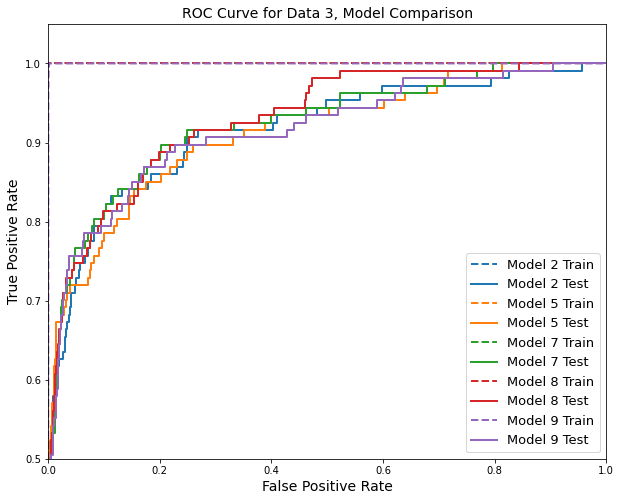

In [20]:
model_list = [model_2, model_5, model_7, model_8, model_9]
model_names_list = ['Model 2', 'Model 5', 'Model 7', 'Model 8', 'Model 9']

compare_models(3, X_train, y_train, X_test, y_test, model_list, model_names_list, 'Model_l5789', 1, 1)

## Modeling at max_depth=6

I would like to see if I can decrease the overfitting at max_depth=6.

I use the optimized class imbalance method for max_depth=6: 
* sample_weight + scale_pos_weight=20

In [31]:
# Model at max_depth=6, 
# class balanced

xgbParams = {
    'eval_metric': 'logloss', 
    'random_state': 42,
    'scale_pos_weight': 20,
    'n_estimators': 150, 
    'max_depth': 6,
}

model_depth6 = xgb_model_report(3, X_train, y_train, X_test, y_test, xgbParams, 'model_depth6', 1, 0, 1)

Sample weights are used!
--------

Data 3 Classification Report:

Training Data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      8014
           1       1.00      1.00      1.00       388

    accuracy                           1.00      8402
   macro avg       1.00      1.00      1.00      8402
weighted avg       1.00      1.00      1.00      8402

Testing Data:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      1994
           1       0.72      0.62      0.66       107

    accuracy                           0.97      2101
   macro avg       0.85      0.80      0.82      2101
weighted avg       0.97      0.97      0.97      2101



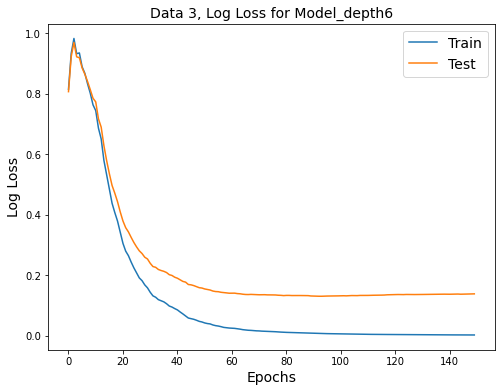

In [32]:
plot_logloss(3, model_depth6, 'Model_depth6', 0)

### Booster Rounds and Pruning at max_depth=6

Sample weights are used!
--------



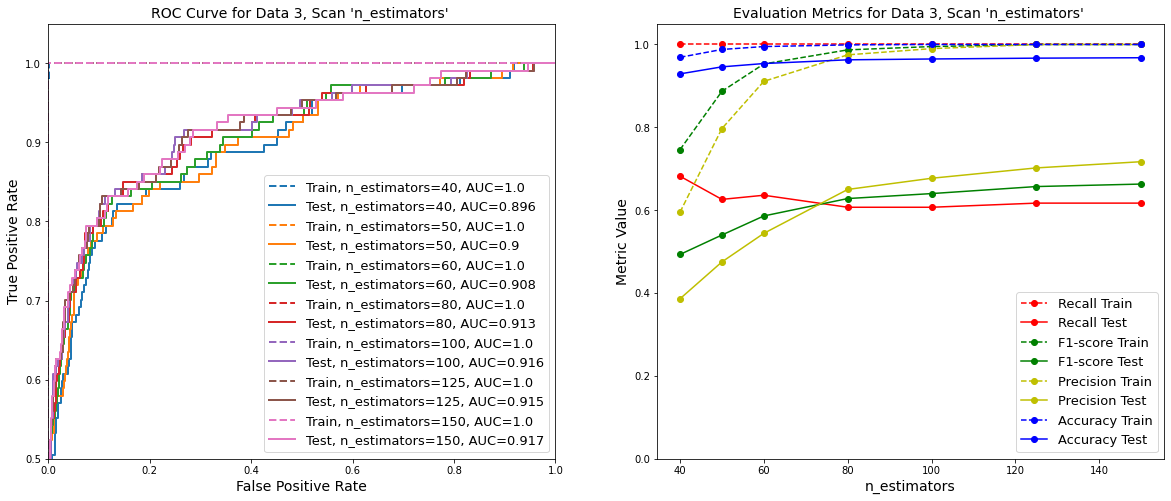

In [34]:
# Scan n_estimator
#max_depth=6

xgbParams = {
    'eval_metric': 'logloss', 
    'random_state': 42,
    'scale_pos_weight': 20,
    'max_depth': 6,
}

scanParam = 'n_estimators'

scanList = [40, 50, 60, 80, 100, 125, 150]

results_est_dep6 = scan_xgb_ROC_metrics(3, X_train, y_train, X_test, y_test, xgbParams, scanParam, scanList, 1, 1, 0)


In [35]:
results_est_dep6

precision  recall     f1  accuracy    auc  \
Params                                                                
n_estimators=40  Train        0.595   1.000  0.746     0.969  1.000   
Test                          0.386   0.682  0.493     0.929  0.896   
n_estimators=50  Train        0.797   1.000  0.887     0.988  1.000   
Test                          0.475   0.626  0.540     0.946  0.900   
n_estimators=60  Train        0.911   1.000  0.953     0.995  1.000   
Test                          0.544   0.636  0.586     0.954  0.908   
n_estimators=80  Train        0.975   1.000  0.987     0.999  1.000   
Test                          0.650   0.607  0.628     0.963  0.913   
n_estimators=100  Train       0.990   1.000  0.995     1.000  1.000   
Test                          0.677   0.607  0.640     0.965  0.916   
n_estimators=125  Train       1.000   1.000  1.000     1.000  1.000   
Test                          0.702   0.617  0.657     0.967  0.915   
n_estimators=150  Train       1.000   1.000  1.000     1.000  1.000   
Test                          0.717   0.617  0.663     0.968  0.917   

                          prec_diff_sc  rec_diff_sc  f1_diff_sc  \
Params                                                            
n_estimators=40  Train        0.541451     0.466276    0.513185   
Test                               NaN          NaN         NaN   
n_estimators=50  Train        0.677895     0.597444    0.642593   
Test                               NaN          NaN         NaN   
n_estimators=60  Train        0.674632     0.572327    0.626280   
Test                               NaN          NaN         NaN   
n_estimators=80  Train        0.500000     0.647446    0.571656   
Test                               NaN          NaN         NaN   
n_estimators=100  Train       0.462334     0.647446    0.554688   
Test                               NaN          NaN         NaN   
n_estimators=125  Train       0.424501     0.620746    0.522070   
Test                               NaN          NaN         NaN   
n_estimators=150  Train       0.394700     0.620746    0.508296   
Test                               NaN          NaN         NaN   

                          overfit_measure  
Params                                     
n_estimators=40  Train           0.506970  
Test                                  NaN  
n_estimators=50  Train           0.639310  
Test                                  NaN  
n_estimators=60  Train           0.624413  
Test                                  NaN  
n_estimators=80  Train           0.573034  
Test                                  NaN  
n_estimators=100  Train          0.554823  
Test                                  NaN  
n_estimators=125  Train          0.522439  
Test                                  NaN  
n_estimators=150  Train          0.507914  
Test                                  NaN

Sample weights are used!
--------



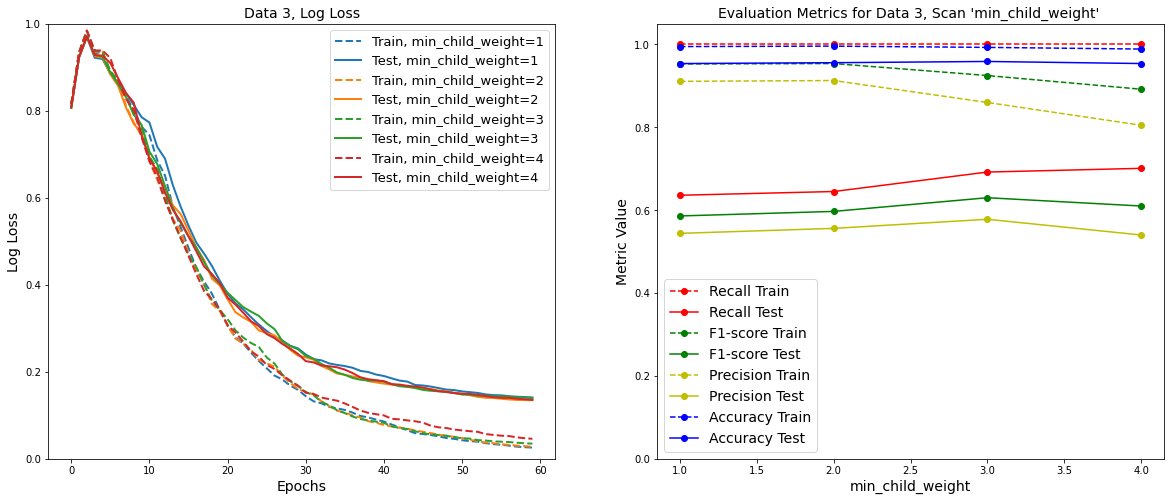

In [44]:
#Scan min_child_weight
#max_depth=6

xgbParams = {
    'eval_metric': 'logloss', 
    'random_state': 42,
    'scale_pos_weight': 20,
    'n_estimators': 60, 
    'max_depth': 6,

}

scanParam = 'min_child_weight'

scanList = [1, 2, 3, 4]

result_child_dep6 = scan_xgb_logloss_metrics(3, X_train, y_train, X_test, y_test, xgbParams, scanParam, scanList, 1, 1, 0)


Sample weights are used!
--------



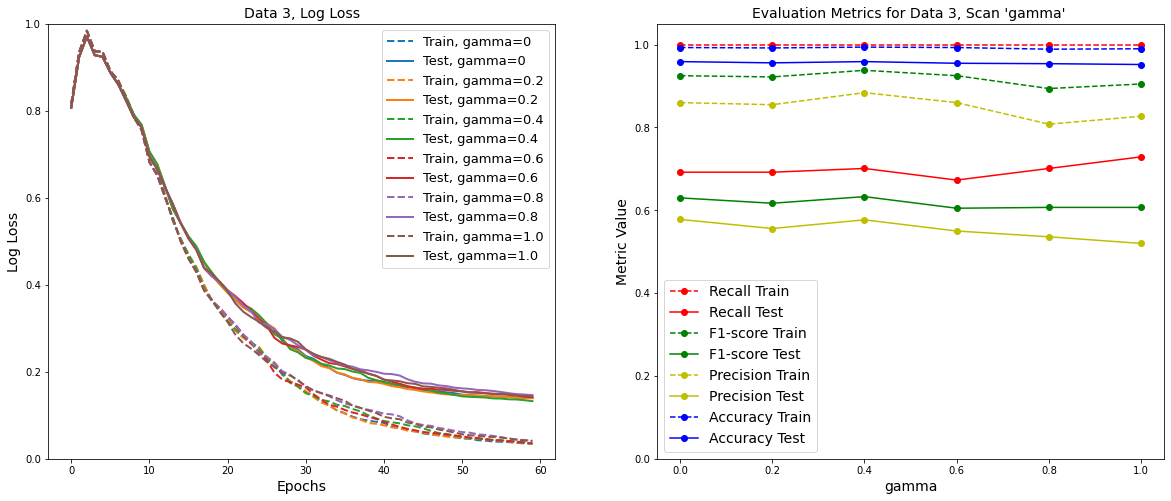

In [45]:
#Scan gamma

xgbParams = {
    'eval_metric': 'logloss', 
    'random_state': 42,
    'scale_pos_weight': 20,
    'n_estimators': 60, 
    'max_depth': 6,
    'min_child_weight': 3,
}

scanParam = 'gamma'

scanList = [0, 0.2, 0.4, 0.6, 0.8, 1.0]

result_gamma_dep6 = scan_xgb_logloss_metrics(3, X_train, y_train, X_test, y_test, xgbParams, scanParam, scanList, 1, 1, 0)


In [48]:
#Model at max_depth=6

xgbParams = {
    'eval_metric': 'logloss', 
    'random_state': 42,
    'scale_pos_weight': 20,
    'n_estimators': 60, 
    'max_depth': 6,
    'min_child_weight': 3,
    'gamma': 0,
}

model_depth6 = xgb_model_report(3, X_train, y_train, X_test, y_test, xgbParams, 'model_depth6', 1, 0, 1)

Sample weights are used!
--------

Data 3 Classification Report:

Training Data:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      8014
           1       0.86      1.00      0.92       388

    accuracy                           0.99      8402
   macro avg       0.93      1.00      0.96      8402
weighted avg       0.99      0.99      0.99      8402

Testing Data:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98      1994
           1       0.58      0.69      0.63       107

    accuracy                           0.96      2101
   macro avg       0.78      0.83      0.80      2101
weighted avg       0.96      0.96      0.96      2101



### Regularization and Sampling at max_depth=6

Sample weights are used!
--------



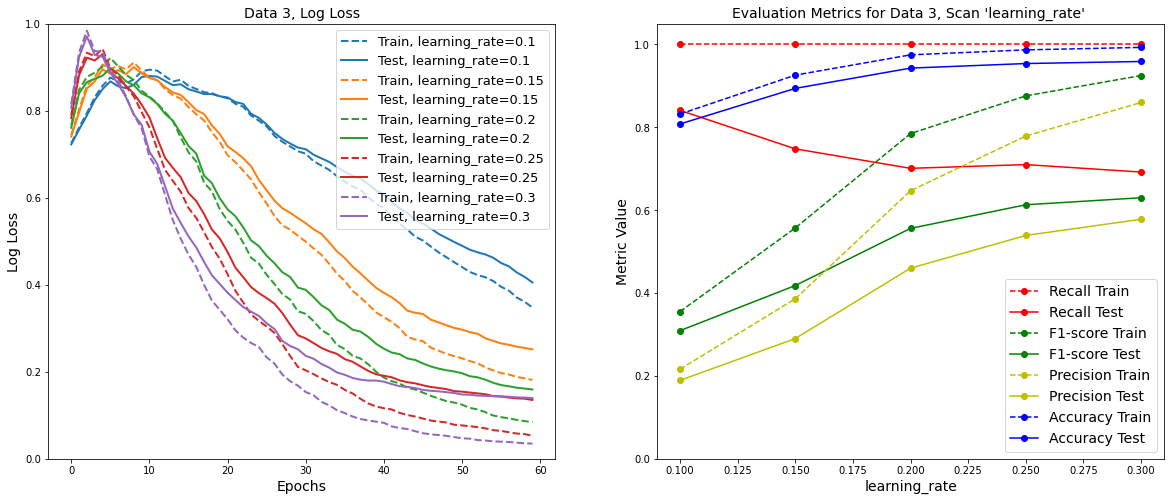

In [49]:
#Scan learning_rate, 

xgbParams = {
    'eval_metric': 'logloss', 
    'random_state': 42,
    'scale_pos_weight': 20,
    'n_estimators': 60, 
    'max_depth': 6,
    'min_child_weight': 3,
    'gamma': 0,
}

scanParam = 'learning_rate'

scanList = [0.10, 0.15, 0.20, 0.25, 0.30]

result_learnRate_dep6 = scan_xgb_logloss_metrics(3, X_train, y_train, X_test, y_test, xgbParams, scanParam, scanList, 1, 1, 0)


Sample weights are used!
--------



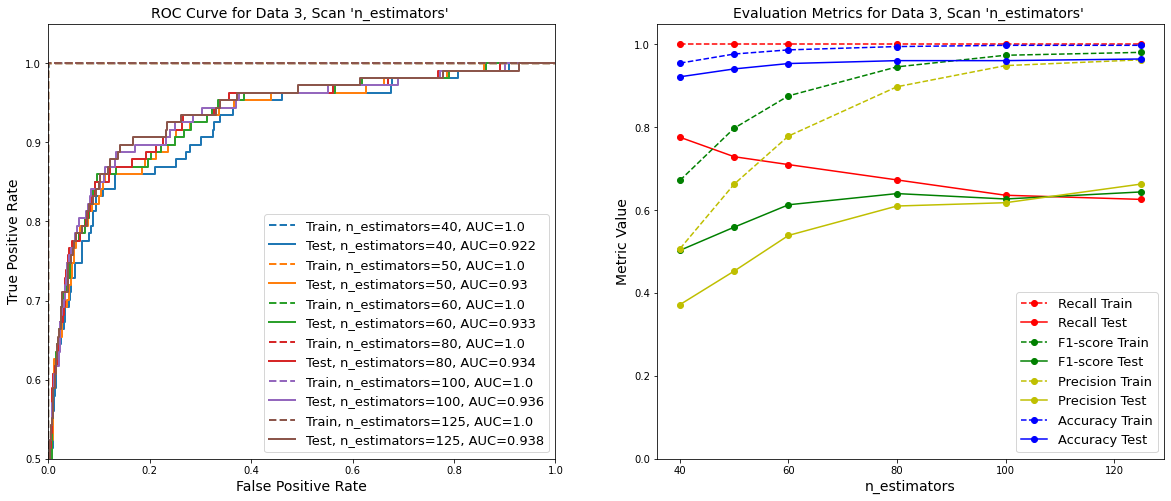

In [51]:
# Scan n_estimator
#max_depth=6

xgbParams = {
    'eval_metric': 'logloss', 
    'random_state': 42,
    'scale_pos_weight': 20,
    'max_depth': 6,
    'min_child_weight': 3,
    'gamma': 0,
    'learning_rate': 0.25
}

scanParam = 'n_estimators'

scanList = [40, 50, 60, 80, 100, 125]

results_est_dep6_2 = scan_xgb_ROC_metrics(3, X_train, y_train, X_test, y_test, xgbParams, scanParam, scanList, 1, 1, 0)


Sample weights are used!
--------



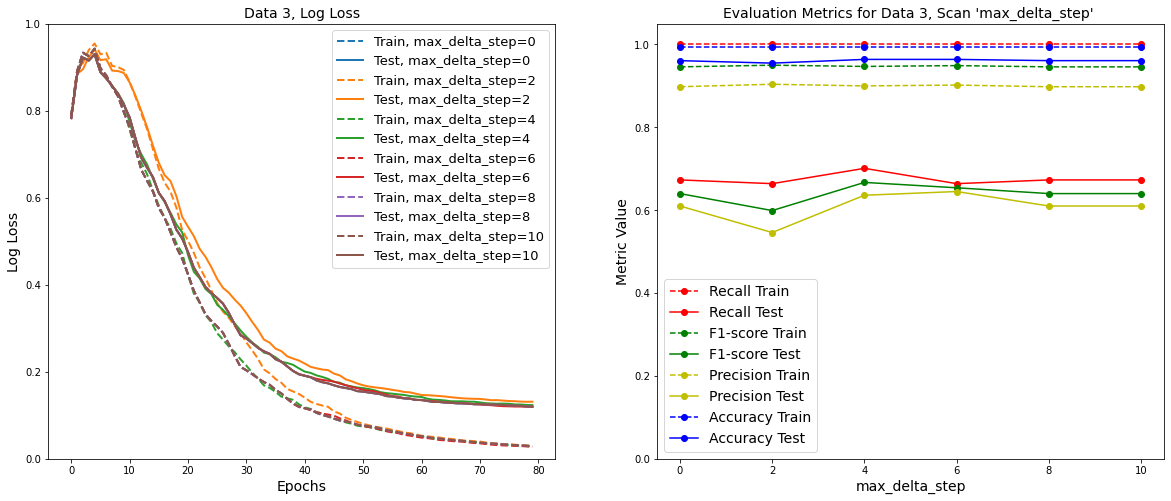

In [52]:
#Scan max_delta_step 
#max_depth=6

xgbParams = {
    'eval_metric': 'logloss', 
    'random_state': 42,
    'scale_pos_weight': 20,
    'n_estimators': 80, 
    'max_depth': 6,
    'min_child_weight': 3,
    'gamma': 0,
    'learning_rate': 0.25,
}

scanParam = 'max_delta_step'

scanList = [0, 2, 4, 6, 8, 10]

result_delta_dep6 = scan_xgb_logloss_metrics(3, X_train, y_train, X_test, y_test, xgbParams, scanParam, scanList, 1, 1, 0)



Sample weights are used!
--------



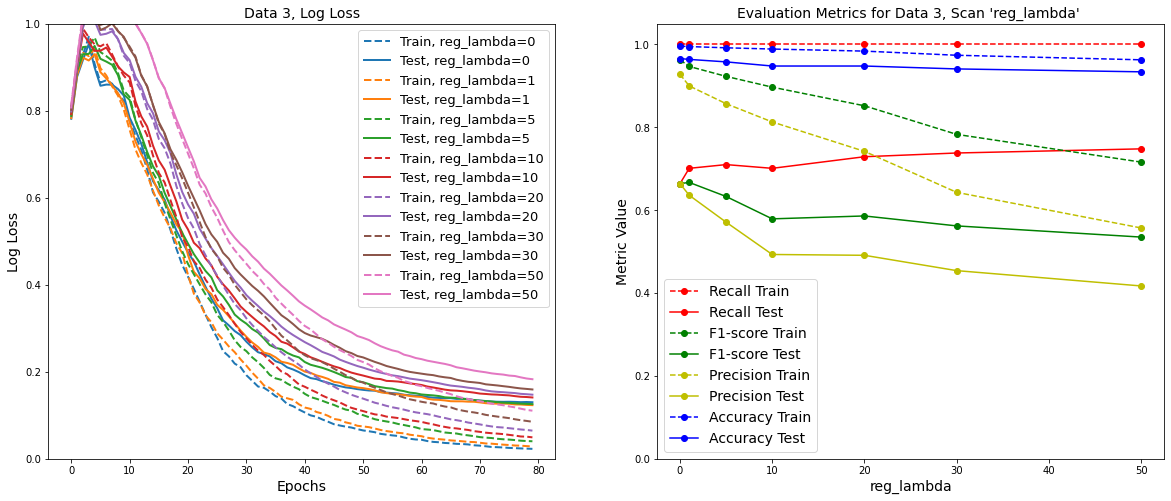

In [88]:
#Scan reg_lambda
#max_depth=6

xgbParams = {
    'eval_metric': 'logloss', 
    'random_state': 42,
    'scale_pos_weight': 20,
    'n_estimators': 80, 
    'max_depth': 6,
    'min_child_weight': 3,
    'gamma': 0,
    'learning_rate': 0.25,
    'max_delta_step': 4,
    'reg_alpha': 0,
}

scanParam = 'reg_lambda'

scanList = [0, 1, 5, 10, 20, 30, 50]  #default=1

result_lambda_dep6 = scan_xgb_logloss_metrics(3, X_train, y_train, X_test, y_test, xgbParams, scanParam, scanList, 1, 1, 0)



Sample weights are used!
--------



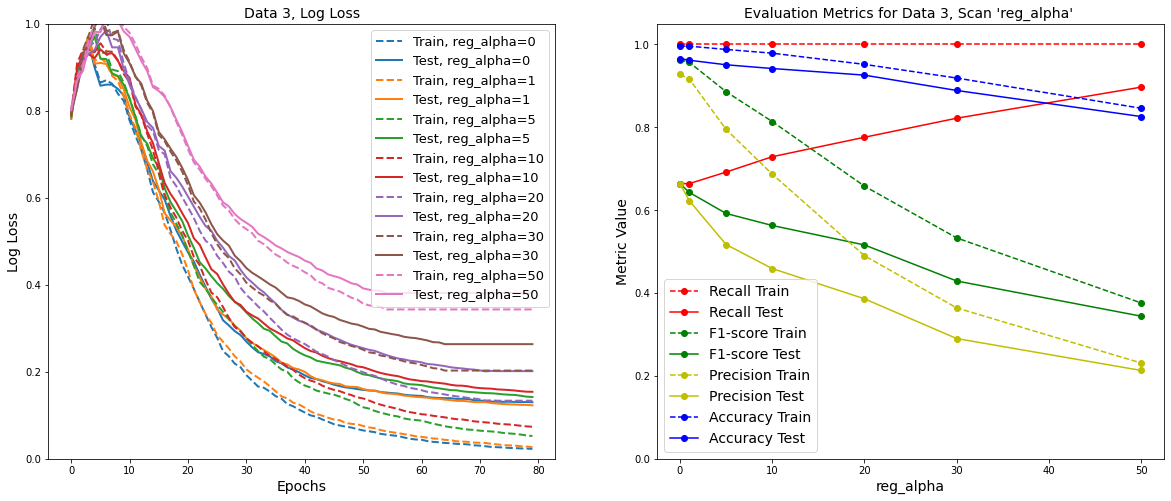

In [90]:
#Scan reg_lambda
#max_depth=6

xgbParams = {
    'eval_metric': 'logloss', 
    'random_state': 42,
    'scale_pos_weight': 20,
    'n_estimators': 80, 
    'max_depth': 6,
    'min_child_weight': 3,
    'gamma': 0,
    'learning_rate': 0.25,
    'max_delta_step': 4,
    'reg_lambda': 0,
}

scanParam = 'reg_alpha'

scanList = [0, 1, 5, 10, 20, 30, 50]  #default=1

result_alpha_dep6 = scan_xgb_logloss_metrics(3, X_train, y_train, X_test, y_test, xgbParams, scanParam, scanList, 1, 1, 0)


Sample weights are used!
--------



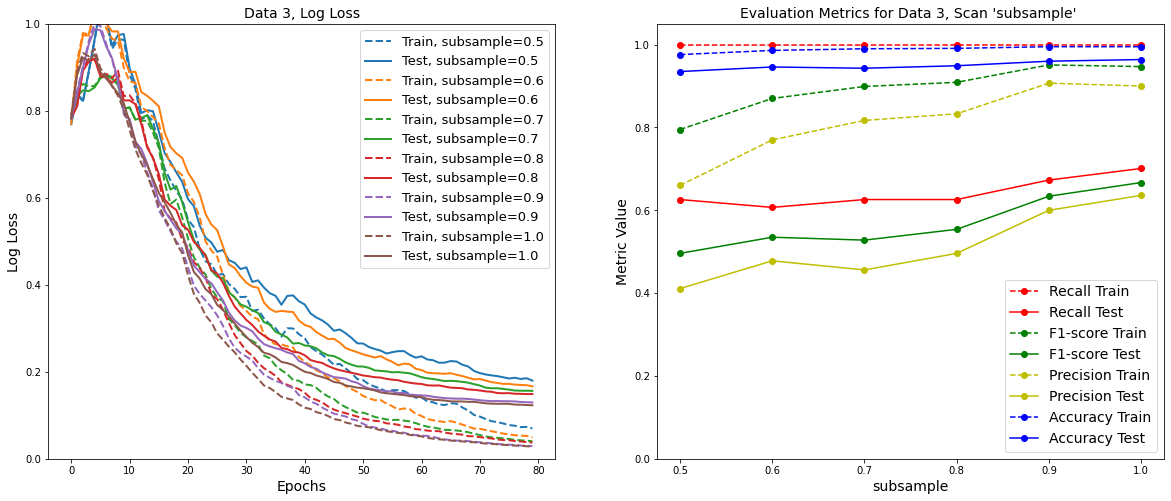

In [91]:
#Scan subsample
#max_depth=6

xgbParams = {
    'eval_metric': 'logloss', 
    'random_state': 42,
    'scale_pos_weight': 20,
    'n_estimators': 80, 
    'max_depth': 6,
    'min_child_weight': 3,
    'gamma': 0,
    'learning_rate': 0.25,
    'max_delta_step': 4,
    'reg_lambda': 1,
    'reg_alpha': 0,
}

scanParam = 'subsample'

scanList = [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

result_subsample_dep6 = scan_xgb_logloss_metrics(3, X_train, y_train, X_test, y_test, xgbParams, scanParam, scanList, 1, 1, 0)



Sample weights are used!
--------



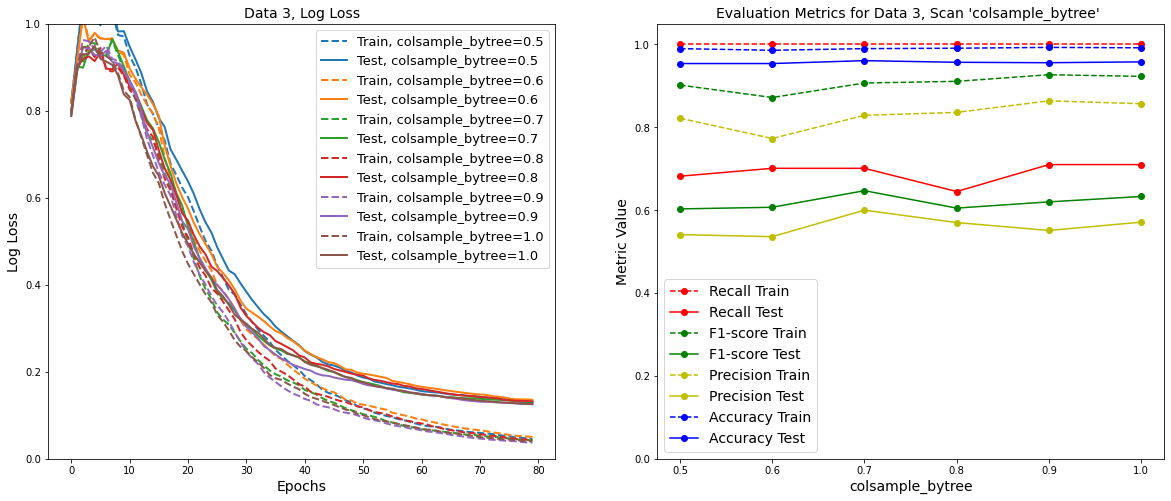

In [92]:
#Scan colsample_bytree
#max_depth=6

xgbParams = {
    'eval_metric': 'logloss', 
    'random_state': 42,
    'scale_pos_weight': 20,
    'n_estimators': 80, 
    'max_depth': 6,
    'min_child_weight': 3,
    'gamma': 0,
    'learning_rate': 0.25,
    'max_delta_step': 4,
    'reg_lambda': 5,
    'reg_alpha': 0,
    'subsample': 1,
}

scanParam = 'colsample_bytree'

scanList = [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

result_colsample_dep6 = scan_xgb_logloss_metrics(3, X_train, y_train, X_test, y_test, xgbParams, scanParam, scanList, 1, 1, 0)


### Model 10: Model at max_depth=6, optimized

In [14]:
#Model 10, optimized at max_depth=6

xgbParams = {
    'eval_metric': 'logloss', 
    'random_state': 42,
    'scale_pos_weight': 20,
    'n_estimators': 80, 
    'max_depth': 6,
    'min_child_weight': 3,
    'gamma': 0,
    'learning_rate': 0.25,
    'max_delta_step': 4,
    'reg_lambda': 1,
    'reg_alpha': 0,
    'subsample': 1,
    'colsample_bytree': 1,
}

model_10 = xgb_model_report(3, X_train, y_train, X_test, y_test, xgbParams, 'model_10', 1, 1, 1)


Sample weights are used!
Data 3 Classification Report:

Training Data:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      8014
           1       0.90      1.00      0.95       388

    accuracy                           0.99      8402
   macro avg       0.95      1.00      0.97      8402
weighted avg       1.00      0.99      1.00      8402

Testing Data:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1994
           1       0.64      0.70      0.67       107

    accuracy                           0.96      2101
   macro avg       0.81      0.84      0.82      2101
weighted avg       0.97      0.96      0.97      2101



In [94]:
model_10.get_params

<bound method XGBModel.get_params of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.25, max_delta_step=4,
              max_depth=6, min_child_weight=3, missing=nan,
              monotone_constraints='()', n_estimators=80, n_jobs=4,
              num_parallel_tree=1, random_state=42, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=20, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)>

precision  recall     f1  accuracy    auc
Params                                                     
Model 7  Train        0.771   1.000  0.871     0.986  1.000
Test                  0.535   0.720  0.614     0.954  0.923
Model 9  Train        0.719   1.000  0.836     0.982  1.000
Test                  0.554   0.720  0.626     0.956  0.916
Model 10  Train       0.900   1.000  0.947     0.995  1.000
Test                  0.636   0.701  0.667     0.964  0.931

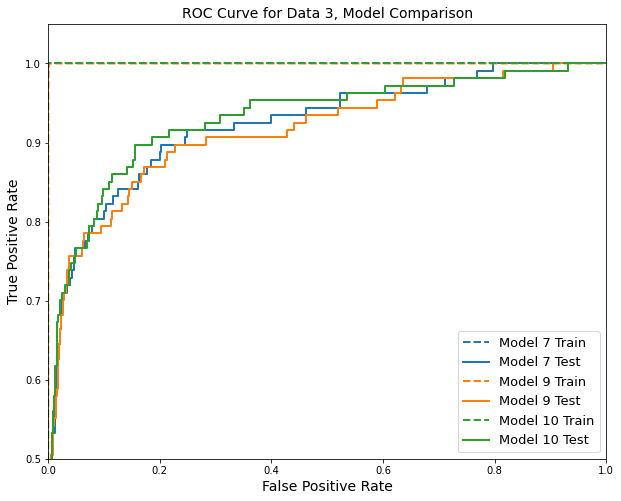

In [95]:
model_list = [model_7, model_9, model_10]
model_names_list = ['Model 7', 'Model 9', 'Model 10']

compare_models(3, X_train, y_train, X_test, y_test, model_list, model_names_list, 'Model_7910', 1, 1)

precision  recall     f1  accuracy    auc
Params                                                     
Model 1  Train        1.000   1.000  1.000     1.000  1.000
Test                  0.926   0.467  0.621     0.971  0.941
Model 2  Train        0.990   1.000  0.995     1.000  1.000
Test                  0.677   0.607  0.640     0.965  0.916
Model 3  Train        0.956   1.000  0.977     0.998  1.000
Test                  0.645   0.645  0.645     0.964  0.922
Model 7  Train        0.771   1.000  0.871     0.986  1.000
Test                  0.535   0.720  0.614     0.954  0.923
Model 9  Train        0.719   1.000  0.836     0.982  1.000
Test                  0.554   0.720  0.626     0.956  0.916
Model 10  Train       0.900   1.000  0.947     0.995  1.000
Test                  0.636   0.701  0.667     0.964  0.931

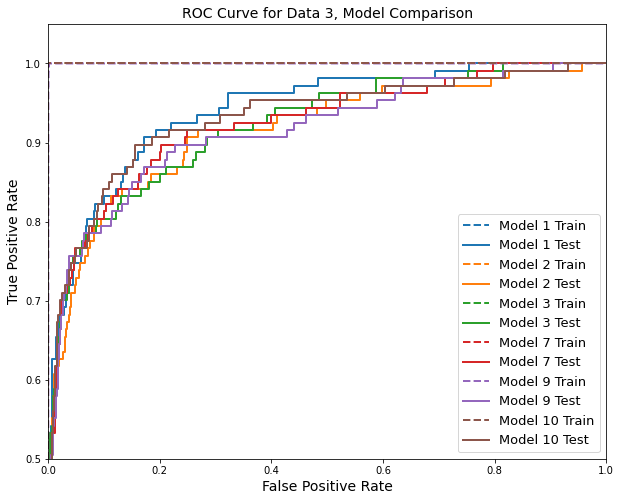

In [16]:
model_list = [model_1, model_2, model_3, model_7, model_9, model_10]
model_names_list = ['Model 1', 'Model 2', 'Model 3', 'Model 7', 'Model 9', 'Model 10']

compare_models(3, X_train, y_train, X_test, y_test, model_list, model_names_list, 'Model_1237910', 1, 1)


## Best Model for Data 3

Model 9 is the best model for Data 3

In [5]:
# Best Model

xgbParams_best_d3 = {
    'eval_metric': 'logloss', 
    'random_state': 42,
    'scale_pos_weight': 4.5,
    'n_estimators': 125, 
    'max_depth': 4,
    'min_child_weight': 3,
    'gamma': 0,
    'learning_rate': 0.20,
    'max_delta_step': 0,
    'reg_lambda': 1,
    'reg_alpha': 0,
    'subsample': 1,
    'colsample_bytree': 1  
}

d3_best_model = xgb_model_report(3, X_train, y_train, X_test, y_test, xgbParams_best_d3, 'Best_Model', 1, 1, 1)

Sample weights are used!
Data 3 Classification Report:

Training Data:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99      8014
           1       0.72      1.00      0.84       388

    accuracy                           0.98      8402
   macro avg       0.86      0.99      0.91      8402
weighted avg       0.99      0.98      0.98      8402

Testing Data:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98      1994
           1       0.55      0.72      0.63       107

    accuracy                           0.96      2101
   macro avg       0.77      0.84      0.80      2101
weighted avg       0.96      0.96      0.96      2101



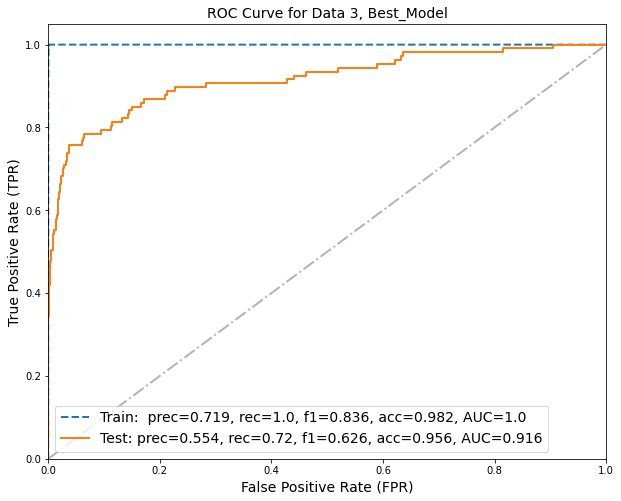

In [7]:
plot_ROC(3, X_train, y_train, X_test, y_test, d3_best_model, 'Best_Model', 1)

In [8]:
d3_best_model.get_params

<bound method XGBModel.get_params of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.2, max_delta_step=0,
              max_depth=4, min_child_weight=3, missing=nan,
              monotone_constraints='()', n_estimators=125, n_jobs=4,
              num_parallel_tree=1, random_state=42, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=4.5, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)>

In [9]:
d3_importance = d3_best_model.feature_importances_

In [10]:
d3_attribute_importance = pd.DataFrame([df3.columns, d3_importance], index=['Attribute', 'Importance']).T
d3_attribute_importance.set_index('Attribute', inplace=True)
d3_attribute_importance.sort_values(by='Importance', ascending=False, inplace=True)
d3_attribute_importance.head(20)

Importance
Attribute           
Attr26     0.0694576
Attr52     0.0441552
Attr27     0.0385762
Attr34     0.0366465
Attr50     0.0324217
Attr24     0.0314151
Attr8      0.0295349
Attr13     0.0291085
Attr19     0.0282178
Attr9      0.0280345
Attr21     0.0272887
Attr53      0.023802
Attr64     0.0235191
Attr5      0.0217209
Attr46     0.0197845
Attr12     0.0197773
Attr22     0.0191855
Attr10     0.0190969
Attr3      0.0175643
Attr41     0.0167061